# Problem Statement

__India's fastest growing and largest by revenue commerce business company aim to build operating system for commerce, through combination of world-class infrastructure, logistics operations of highest quality and cutting-edge engineering and technology capabilities. These intelligence and capabilities made by their Data Team help the company to widen gap between their competitors in terms of quality, efficiency and profitability. From given dataset, company wants to understand and process the data coming out of data engineering pipelines. Make sense out of raw data and get useful features out of it to help data science team in building forecasting models on it.__

## Importing Librabries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from scipy import stats
import statsmodels.api as sm

## Reading the given dataset

In [4]:
raw_df = pd.read_csv('delhivery_data.csv')

In [5]:
raw_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [6]:
raw_df.tail()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 16:24:28.436231,70.039010,426.0,95.0,88.7319,4.484211,268.0,9.0,8.8088,29.777778


In [7]:
raw_df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [8]:
raw_df.iloc[0]

data                                                                       training
trip_creation_time                                       2018-09-20 02:35:36.476840
route_schedule_uuid               thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...
route_type                                                                  Carting
trip_uuid                                                   trip-153741093647649320
source_center                                                          IND388121AAA
source_name                                              Anand_VUNagar_DC (Gujarat)
destination_center                                                     IND388620AAB
destination_name                                      Khambhat_MotvdDPP_D (Gujarat)
od_start_time                                            2018-09-20 03:21:32.418600
od_end_time                                              2018-09-20 04:47:45.236797
start_scan_to_end_scan                                                      

__From above details we can definitely remove some columns that do not add value in creating new features and insights about business__

1. route_schedule_uuid
2. cutoff_factor
3. cutoff_timestamp
4. factor
5. segment_factor

In [9]:
df = raw_df.copy()
df = df.drop(columns=['route_schedule_uuid', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'])

## Checking number of rows and columns in dataset

In [10]:
df.shape

(144867, 19)

## Summary of attributes of data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_type                      144867 non-null  object 
 3   trip_uuid                       144867 non-null  object 
 4   source_center                   144867 non-null  object 
 5   source_name                     144574 non-null  object 
 6   destination_center              144867 non-null  object 
 7   destination_name                144606 non-null  object 
 8   od_start_time                   144867 non-null  object 
 9   od_end_time                     144867 non-null  object 
 10  start_scan_to_end_scan          144867 non-null  float64
 11  is_cutoff                       144867 non-null  bool   
 12  actual_distance_

## STEP 01 : Basic data cleaning and exploration

## 1.a Check for null/missing values

In [12]:
round((df.isnull().sum() / len(df)) * 100, 2)

data                              0.00
trip_creation_time                0.00
route_type                        0.00
trip_uuid                         0.00
source_center                     0.00
source_name                       0.20
destination_center                0.00
destination_name                  0.18
od_start_time                     0.00
od_end_time                       0.00
start_scan_to_end_scan            0.00
is_cutoff                         0.00
actual_distance_to_destination    0.00
actual_time                       0.00
osrm_time                         0.00
osrm_distance                     0.00
segment_actual_time               0.00
segment_osrm_time                 0.00
segment_osrm_distance             0.00
dtype: float64

__From above observation it is clear that there are some missing values in the source_name and destination_name columns__

## Missing Values Treatment

In [13]:
# either source name or destination name is missing
df[(df['source_name'].isna()) | (df['destination_name'].isna())]

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
110,training,2018-09-25 08:53:04.377810,FTL,trip-153786558437756691,IND342601AAA,Piparcity_BsstdDPP_D (Rajasthan),IND342902A1B,NaN,2018-09-26 05:04:49.254901,2018-09-26 06:58:08.054001,113.0,True,24.538214,58.0,33.0,30.8845,58.0,33.0,30.8845
111,training,2018-09-25 08:53:04.377810,FTL,trip-153786558437756691,IND342601AAA,Piparcity_BsstdDPP_D (Rajasthan),IND342902A1B,NaN,2018-09-26 05:04:49.254901,2018-09-26 06:58:08.054001,113.0,False,34.657709,110.0,43.0,41.5361,52.0,10.0,10.6517
112,training,2018-09-25 08:53:04.377810,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,22.783440,48.0,34.0,37.7749,48.0,34.0,37.7749
113,training,2018-09-25 08:53:04.377810,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,46.071250,98.0,41.0,56.3575,49.0,33.0,34.1661
114,training,2018-09-25 08:53:04.377810,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,67.714993,127.0,58.0,80.4811,29.0,17.0,24.1236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144484,test,2018-10-03 09:06:06.690094,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,2018-10-03 22:10:43.366324,276.0,True,45.134384,62.0,45.0,47.7734,34.0,23.0,23.6601
144485,test,2018-10-03 09:06:06.690094,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,2018-10-03 22:10:43.366324,276.0,True,66.542266,86.0,71.0,71.9549,23.0,25.0,24.1815
144486,test,2018-10-03 09:06:06.690094,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,2018-10-03 22:10:43.366324,276.0,True,88.143957,116.0,114.0,112.6943,30.0,43.0,40.7394
144487,test,2018-10-03 09:06:06.690094,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,2018-10-03 22:10:43.366324,276.0,True,111.084417,173.0,123.0,134.1940,57.0,45.0,46.9217


In [14]:
# check for missing destination name in source name
dest_na = df[(df['source_name'].notna()) & (df['destination_name'].isna())]['destination_center'].unique().tolist()
for i in dest_na:
    print(df[df['source_center']==i]['source_name'].unique())

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[]
[]
[]


In [15]:
# check for missing source name in destination name
surc_na = df[(df['source_name'].isna()) & (df['destination_name'].notna())]['source_center'].unique().tolist()
for i in surc_na:
    print(df[df['destination_center']==i]['destination_name'].unique())

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]


In [16]:
df['source_name'].isna().sum()

293

In [17]:
df['destination_name'].isna().sum()

261

__From above it is observed that, we can not find any clue for null values of either source_name or destination_name__

__Imputing with 'most_frequent' value doesn't make any sense as there are unique ids for each source & destination name__

__The percentage of null values is vary less so we can drop those rows__

In [18]:
trip_id_lst = df[(df['source_name'].isna()) | (df['destination_name'].isna())]['trip_uuid'].unique()
data_count = df[(df['source_name'].isna()) | (df['destination_name'].isna())]['data'].value_counts()

In [19]:
len(trip_id_lst)

110

In [20]:
data_count

test        325
training    226
Name: data, dtype: int64

In [21]:
idx = []
for i in trip_id_lst:
    idx.append(df[df['trip_uuid']==i].index)
# flattening the list of indices
idx = [j for sub in idx for j in sub]

In [22]:
len(idx)

1154

In [23]:
print('% data remaining after deleting rows is ', round(((df.shape[0] - len(idx))/(df.shape[0])*100),2), 'percent')

% data remaining after deleting rows is  99.2 percent


In [24]:
df = df.drop(idx, axis=0)

In [25]:
df['source_name'].isna().sum()

0

In [26]:
df['destination_name'].isna().sum()

0

In [27]:
df.shape

(143713, 19)

## 1.b Analysing & Understanding the structure of DATA

## Check for duplicate entries

__If the boolean series contains only FALSE, means NO DUPLICATE entries in given DataFrame__

In [28]:
df.duplicated(subset=None, keep='first').unique()

array([False])

## Number of unique values in each column

In [29]:
for i in df.columns:
    print(i, ':', df[i].nunique(dropna=True))

data : 2
trip_creation_time : 14707
route_type : 2
trip_uuid : 14707
source_center : 1494
source_name : 1494
destination_center : 1465
destination_name : 1465
od_start_time : 26038
od_end_time : 26038
start_scan_to_end_scan : 1914
is_cutoff : 2
actual_distance_to_destination : 143362
actual_time : 3182
osrm_time : 1531
osrm_distance : 136990
segment_actual_time : 746
segment_osrm_time : 214
segment_osrm_distance : 113131


## Converting ['datetime'] column from (object) dtype to (datetime) dtype

In [30]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

## Conversion of categorical attributes to 'category' dtype

In [31]:
df['data'] = df['data'].astype('category')
df['route_type'] = df['route_type'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143713 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            143713 non-null  category      
 1   trip_creation_time              143713 non-null  datetime64[ns]
 2   route_type                      143713 non-null  category      
 3   trip_uuid                       143713 non-null  object        
 4   source_center                   143713 non-null  object        
 5   source_name                     143713 non-null  object        
 6   destination_center              143713 non-null  object        
 7   destination_name                143713 non-null  object        
 8   od_start_time                   143713 non-null  datetime64[ns]
 9   od_end_time                     143713 non-null  datetime64[ns]
 10  start_scan_to_end_scan          143713 non-null  float64

## List of categorical data

In [32]:
for i in df.columns:
    if df[i].nunique() < 10:
        print(i, ':', np.sort(df[i].unique()))

data : ['test' 'training']
route_type : ['Carting' 'FTL']
is_cutoff : [False  True]


## Count of rows in categorical data

In [33]:
for i in df.columns:
    if df[i].nunique() < 10:
        print("\033[1m" + "\033[94m" + i + "\033[0m")
        print(df[i].value_counts())
        print()

data
training    104358
test         39355
Name: data, dtype: int64

route_type
FTL        98533
Carting    45180
Name: route_type, dtype: int64

is_cutoff
True     117908
False     25805
Name: is_cutoff, dtype: int64



## Getting statistical summary of data

In [34]:
df.describe(include=np.number).round(1)

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,143713.0,143713.0,143713.0,143713.0,143713.0,143713.0,143713.0,143713.0
mean,966.5,235.4,419.3,215.1,286.5,36.2,18.5,22.8
std,1039.3,346.0,599.8,308.9,422.4,53.6,14.8,17.9
min,20.0,9.0,9.0,6.0,9.0,-244.0,0.0,0.0
25%,161.0,23.4,52.0,27.0,29.9,20.0,11.0,12.0
50%,454.0,66.2,132.0,65.0,78.8,28.0,17.0,23.5
75%,1660.0,287.2,519.0,262.0,348.4,40.0,22.0,27.8
max,7898.0,1927.4,4532.0,1686.0,2326.2,3051.0,1611.0,2191.4


In [35]:
df.describe(include=object, datetime_is_numeric=False)

,trip_uuid,source_center,source_name,destination_center,destination_name
count,143713,143713,143713,143713,143713
unique,14707,1494,1494,1465,1465
top,trip-153784927255069118,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,101,23267,23267,15180,15180


In [36]:
df.describe(include='category', datetime_is_numeric=False)

,data,route_type
count,143713,143713
unique,2,2
top,training,FTL
freq,104358,98533


In [37]:
df.iloc[0]

data                                                   training
trip_creation_time                   2018-09-20 02:35:36.476840
route_type                                              Carting
trip_uuid                               trip-153741093647649320
source_center                                      IND388121AAA
source_name                          Anand_VUNagar_DC (Gujarat)
destination_center                                 IND388620AAB
destination_name                  Khambhat_MotvdDPP_D (Gujarat)
od_start_time                        2018-09-20 03:21:32.418600
od_end_time                          2018-09-20 04:47:45.236797
start_scan_to_end_scan                                     86.0
is_cutoff                                                  True
actual_distance_to_destination                         10.43566
actual_time                                                14.0
osrm_time                                                  11.0
osrm_distance                           

In [38]:
df.head(15)

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153
5,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,10.403038,15.0,11.0,12.1171,15.0,11.0,12.1171
6,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18.045481,44.0,17.0,21.2890,28.0,6.0,9.1719
7,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,28.061896,65.0,29.0,35.8252,21.0,11.0,14.5362
8,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,38.939167,76.0,39.0,47.1900,10.0,10.0,11.3648
9,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,False,43.595802,102.0,45.0,53.2334,26.0,6.0,6.0434


### key understanding from the data given
1. "trip_creation_time" is unique for each package delivery
2. "route_type" has two values (carting/FTL) either of is assined to each package delivery as a mode of transport
3. "trip_uuid" is unique for each package delivery
3. For each package delivery there can be multiple source and destination possible
4. "od_start_time" & "od_end_time" indicates start scan time and end scan time for a source-destination pair within given trip respectively and it is unique for each source-destination pair
5. "start_scan_to_end_scan" shows total time taken from start scan to end scan by package to reach destination B from source A and it is unique for each source-destination pair
6. "actual_distance_to_destination" shows cumulative distance travelled by package to reach destination B from source A
7. "actual_time" shows cumulative time taken by package to reach destination B from source A
8. "osrm_time" & "osrm_distance" shows cumulative shortest path time taken & distance travelled by package to reach destination B from source A respectively
9. "segment_actual_time" tells the actual time time taken for each check point within particular source-destination pair
10. "segment_osrm_time" & "segment_osrm_distance" tells shortest path time taken & distance travelled by package for each check point within particular source-destination pair respectively

__Time has unit=mins and Distance has unit=kms__

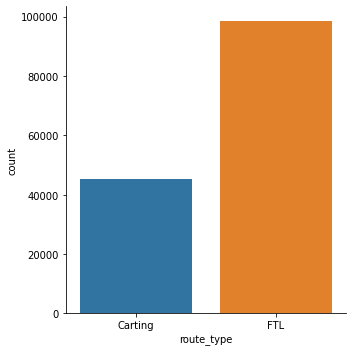

In [39]:
plt.rcdefaults()
sns.catplot(data=df, x='route_type', kind='count')
plt.show()

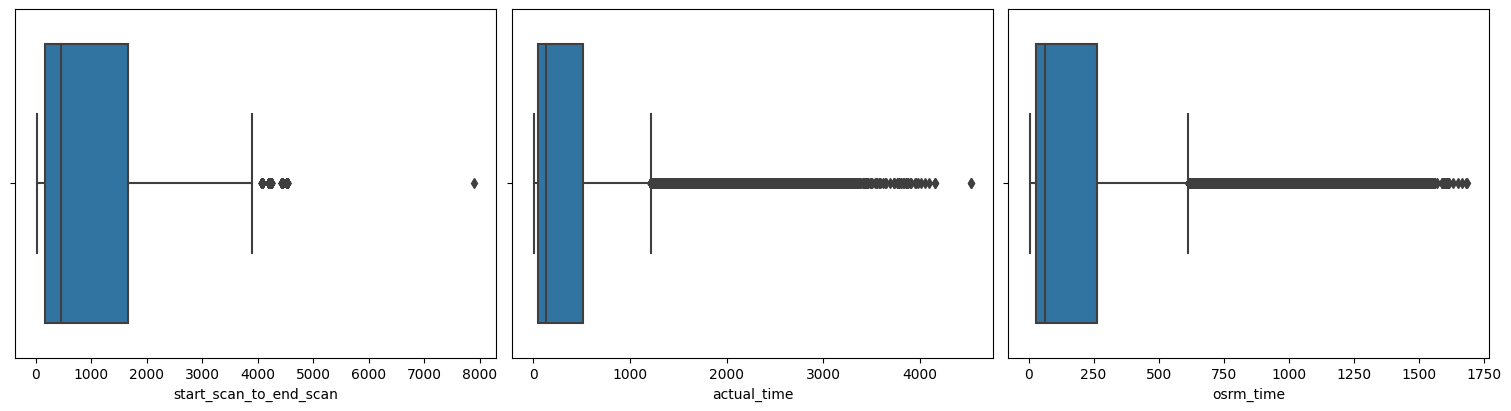

In [40]:
plt.rcdefaults()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), constrained_layout=True)
plt.subplot(131)
sns.boxplot(data=df, x='start_scan_to_end_scan')
plt.subplot(132)
sns.boxplot(data=df, x='actual_time')
plt.subplot(133)
sns.boxplot(data=df, x='osrm_time')
plt.show()

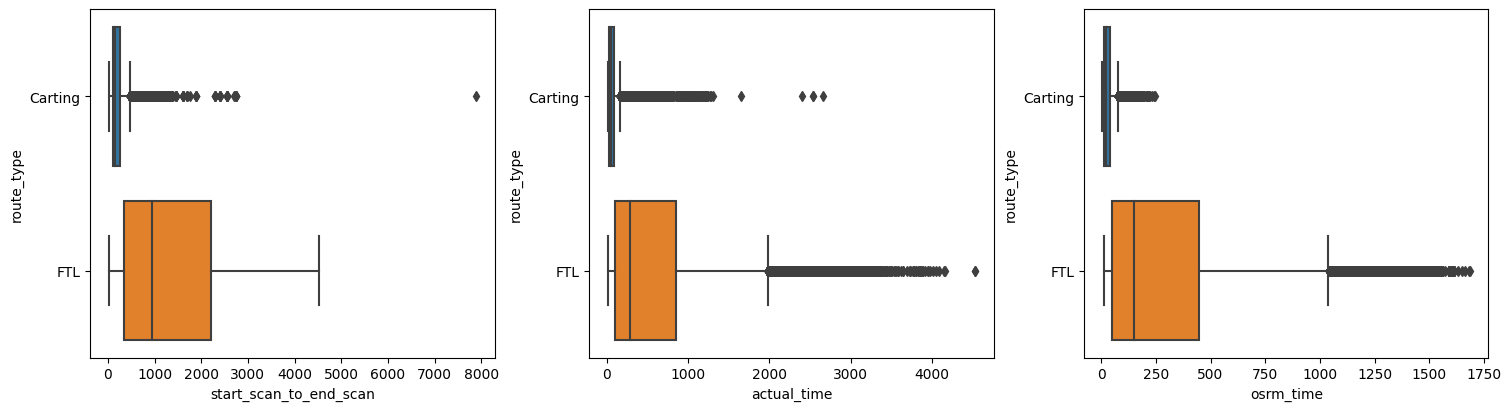

In [41]:
plt.rcdefaults()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), constrained_layout=True)
plt.subplot(131)
sns.boxplot(data=df, x='start_scan_to_end_scan', y='route_type')
plt.subplot(132)
sns.boxplot(data=df, x='actual_time', y='route_type')
plt.subplot(133)
sns.boxplot(data=df, x='osrm_time', y='route_type')
plt.show()

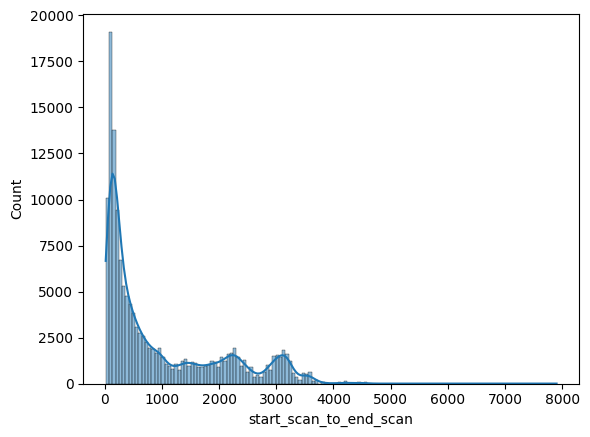

In [42]:
plt.rcdefaults()
sns.histplot(data=df, x='start_scan_to_end_scan', kde=True)
plt.show()

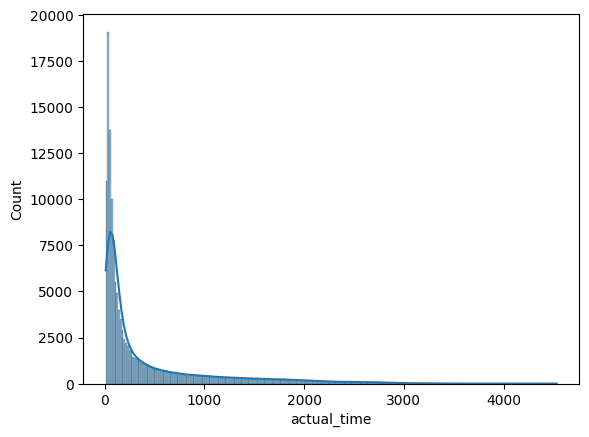

In [43]:
plt.rcdefaults()
sns.histplot(data=df, x='actual_time', kde=True)
plt.show()

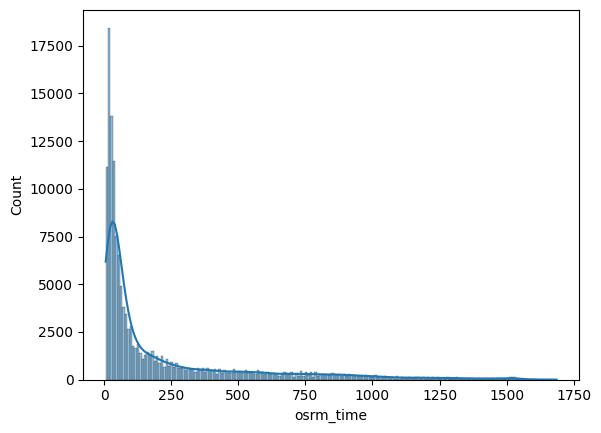

In [44]:
plt.rcdefaults()
sns.histplot(data=df, x='osrm_time', kde=True)
plt.show()

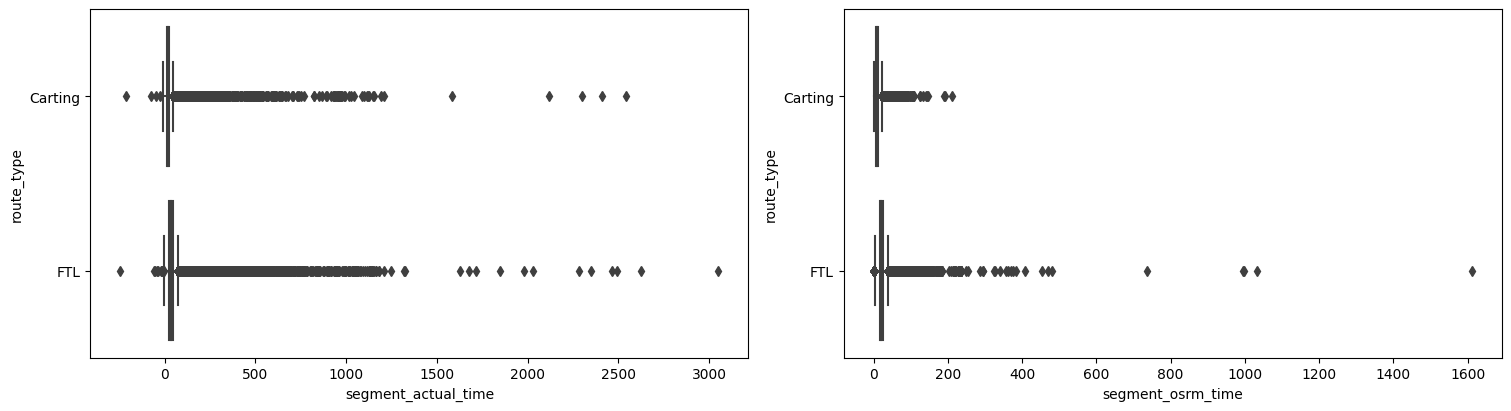

In [45]:
plt.rcdefaults()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), constrained_layout=True)
plt.subplot(121)
sns.boxplot(data=df, x='segment_actual_time', y='route_type')
plt.subplot(122)
sns.boxplot(data=df, x='segment_osrm_time', y='route_type')
plt.show()

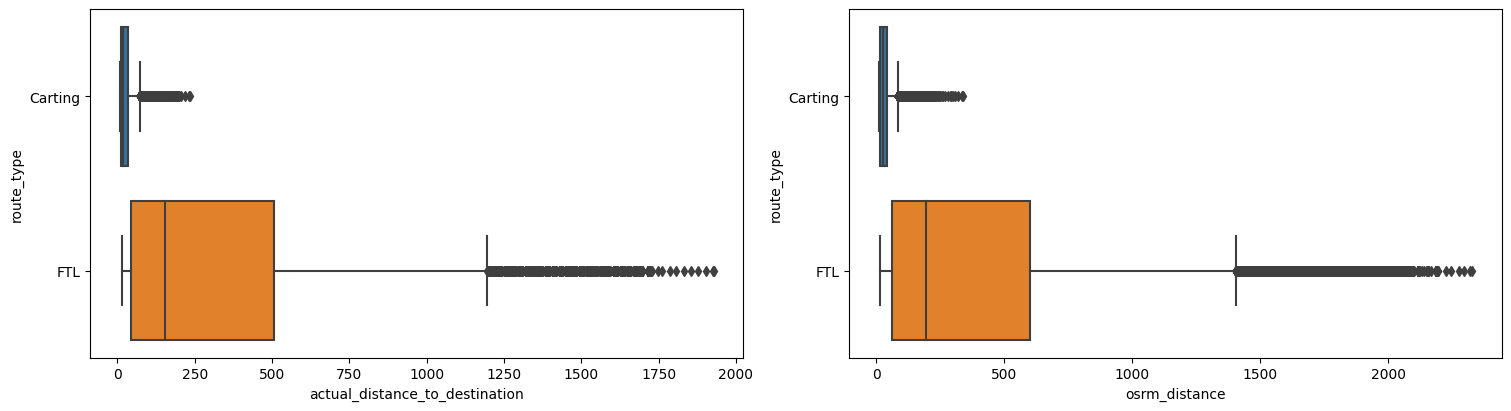

In [46]:
plt.rcdefaults()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), constrained_layout=True)
plt.subplot(121)
sns.boxplot(data=df, x='actual_distance_to_destination', y='route_type')
plt.subplot(122)
sns.boxplot(data=df, x='osrm_distance', y='route_type')
plt.show()

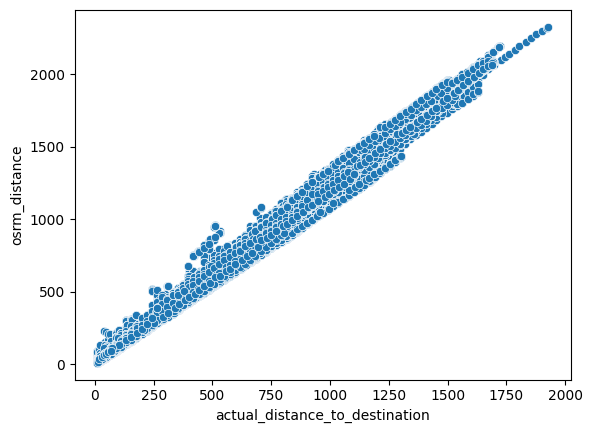

In [47]:
plt.rcdefaults()
sns.scatterplot(data=df, x='actual_distance_to_destination', y='osrm_distance')
plt.show()

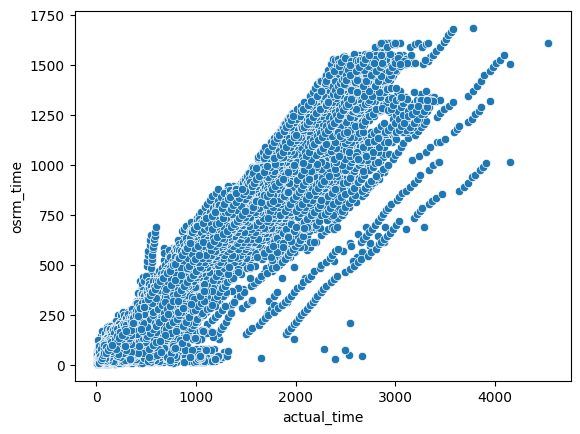

In [48]:
plt.rcdefaults()
sns.scatterplot(data=df, x='actual_time', y='osrm_time')
plt.show()

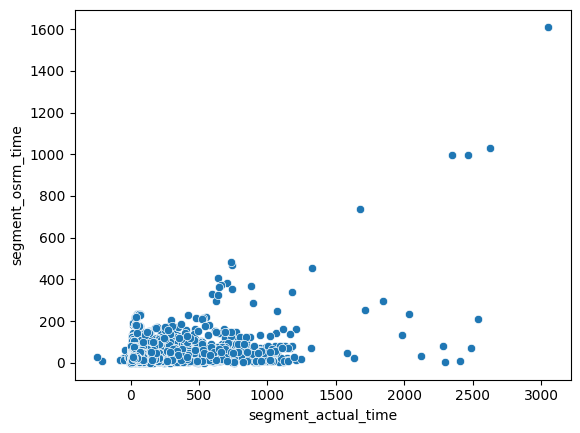

In [49]:
plt.rcdefaults()
sns.scatterplot(data=df, x='segment_actual_time', y='segment_osrm_time')
plt.show()

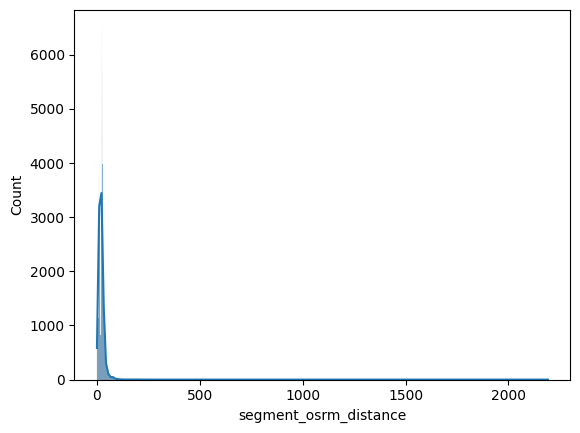

In [50]:
plt.rcdefaults()
sns.histplot(data=df, x='segment_osrm_distance', kde=True)
plt.show()

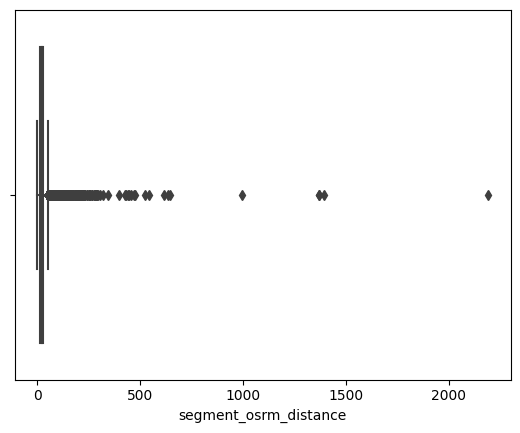

In [51]:
plt.rcdefaults()
sns.boxplot(data=df, x='segment_osrm_distance')
plt.show()

## 1.c Aggregating the data by merging some rows based on particular columns

### Aggregating data over ('trip_uuid', 'source_center', 'destination_center') and taking only last row in that group

In [52]:
df_tsd = pd.DataFrame(df.groupby(['trip_uuid', 
                               'source_center', 
                               'destination_center'], sort=False)[['trip_creation_time',
                                                                   'route_type',
                                                                   'source_name', 
                                                                   'destination_name',  
                                                                   'is_cutoff',
                                                                   'od_start_time', 
                                                                   'od_end_time', 
                                                                   'start_scan_to_end_scan', 
                                                                   'actual_distance_to_destination',
                                                                   'actual_time',
                                                                   'osrm_time',
                                                                   'osrm_distance',
                                                                   'data']].last()).reset_index()
df_tsd = df_tsd.round(1)
df_tsd

,trip_uuid,source_center,destination_center,trip_creation_time,route_type,source_name,destination_name,is_cutoff,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,data
0,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 02:35:36.476840,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),False,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.4,68.0,44.0,54.2,training
1,trip-153741093647649320,IND388620AAB,IND388320AAA,2018-09-20 02:35:36.476840,Carting,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),False,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.6,102.0,45.0,53.2,training
2,trip-153768492602129387,IND421302AAG,IND411033AAA,2018-09-23 06:42:06.021680,FTL,Bhiwandi_Mankoli_HB (Maharashtra),Pune_Tathawde_H (Maharashtra),False,2018-09-23 06:42:06.021680,2018-09-23 11:44:28.365845,302.0,100.7,183.0,95.0,129.4,training
3,trip-153693976643699843,IND400011AAA,IND400072AAD,2018-09-14 15:42:46.437249,Carting,LowerParel_CP (Maharashtra),Mumbai_Chndivli_PC (Maharashtra),False,2018-09-14 15:42:46.437249,2018-09-14 17:31:45.368791,108.0,16.4,60.0,16.0,18.8,training
4,trip-153687145942424248,IND562132AAA,IND560099AAB,2018-09-13 20:44:19.424489,FTL,Bangalore_Nelmngla_H (Karnataka),Bengaluru_Bomsndra_HB (Karnataka),False,2018-09-13 20:44:19.424489,2018-09-13 23:59:56.061158,195.0,39.8,67.0,53.0,52.1,training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26032,trip-153799142965708367,IND457226AAA,IND382430AAB,2018-09-26 19:50:29.657378,FTL,Jaora_RtlamNka_D (Madhya Pradesh),Ahmedabad_East_H_1 (Gujarat),False,2018-09-27 06:55:50.265761,2018-09-27 17:18:35.292509,622.0,265.4,484.0,290.0,388.0,training
26033,trip-153695073416451616,IND400102AAB,IND421302AAG,2018-09-14 18:45:34.164734,Carting,Mumbai_Jogeshwri_L (Maharashtra),Bhiwandi_Mankoli_HB (Maharashtra),False,2018-09-14 18:45:34.164734,2018-09-15 01:19:26.775457,393.0,23.0,344.0,31.0,33.8,training
26034,trip-153761584139918815,IND421302AAG,IND411033AAA,2018-09-22 11:30:41.399439,FTL,Bhiwandi_Mankoli_HB (Maharashtra),Pune_Tathawde_H (Maharashtra),False,2018-09-22 11:30:41.399439,2018-09-22 21:45:05.128533,614.0,100.6,289.0,95.0,129.2,training
26035,trip-153718412883843340,IND600056AAB,IND600032AAB,2018-09-17 11:35:28.838714,Carting,MAA_Poonamallee_HB (Tamil Nadu),Chennai_Hub (Tamil Nadu),False,2018-09-17 11:35:28.838714,2018-09-17 13:32:21.128357,116.0,31.7,84.0,33.0,36.8,training


### Every package delivery with aggregated non numerical features

In [53]:
print('Total unique package deliveries in given data is: ', df['trip_uuid'].nunique())

Total unique package deliveries in given data is:  14707


In [54]:
df_tid_nnf = df.groupby('trip_uuid', sort=False)[['trip_creation_time', 
                                                  'route_type',
                                                  'source_center', 
                                                  'source_name', 
                                                  'destination_center', 
                                                  'destination_name',
                                                  'od_start_time',
                                                  'od_end_time',
                                                  'data']].agg(['first', 'last']).reset_index()

df_tid_nnf.columns = pd.MultiIndex.from_tuples((('trip_uuid','trip_uuid'),
                                                ('trip_creation_time', 'trip_creation_time_first'),
                                                ('trip_creation_time', 'trip_creation_time'),
                                                ('route_type', 'route_type_first'),
                                                ('route_type', 'route_type'),
                                                ('source_center','origin_source_center'),
                                                ('source_center','source_center_last'),
                                                ('source_name','origin_source_name'),
                                                ('source_name','source_name_last'),
                                                ('destination_center', 'destination_center_first'), 
                                                ('destination_center', 'final_destination_center'),
                                                ('destination_name', 'destination_name_first'), 
                                                ('destination_name', 'final_destination_name'),
                                                ('od_start_time', 'origin_od_start_time'),
                                                ('od_start_time', 'od_start_time_last'),
                                                ('od_end_time', 'od_end_time_first'),
                                                ('od_end_time', 'final_od_end_time'),
                                                ('data', 'data_first'),
                                                ('data', 'data')))
df_tid_nnf = df_tid_nnf.droplevel(0, axis=1)
df_tid_nnf = df_tid_nnf.drop(['trip_creation_time_first',
                              'route_type_first',
                              'source_center_last', 
                              'source_name_last', 
                              'destination_center_first', 
                              'destination_name_first',
                              'od_start_time_last',
                              'od_end_time_first',
                              'data_first'], axis=1)

df_tid_nnf = df_tid_nnf[['data', 'trip_uuid', 'trip_creation_time', 'route_type', 
                         'origin_source_center', 'origin_source_name', 
                         'final_destination_center', 'final_destination_name', 
                         'origin_od_start_time', 'final_od_end_time']]
df_tid_nnf

,data,trip_uuid,trip_creation_time,route_type,origin_source_center,origin_source_name,final_destination_center,final_destination_name,origin_od_start_time,final_od_end_time
0,training,trip-153741093647649320,2018-09-20 02:35:36.476840,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 06:36:55.627764
1,training,trip-153768492602129387,2018-09-23 06:42:06.021680,FTL,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-23 06:42:06.021680,2018-09-23 11:44:28.365845
2,training,trip-153693976643699843,2018-09-14 15:42:46.437249,Carting,IND400011AAA,LowerParel_CP (Maharashtra),IND400072AAD,Mumbai_Chndivli_PC (Maharashtra),2018-09-14 15:42:46.437249,2018-09-14 17:31:45.368791
3,training,trip-153687145942424248,2018-09-13 20:44:19.424489,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 20:44:19.424489,2018-09-14 13:55:58.765334
4,test,trip-153825970514894360,2018-09-29 22:21:45.149226,FTL,IND141003AAB,Ludhiana_GillChwk_DC (Punjab),IND000000ACA,Ludhiana_MilrGanj_HB (Punjab),2018-09-30 02:22:04.138164,2018-09-30 06:44:42.320422
...,...,...,...,...,...,...,...,...,...,...
14702,training,trip-153799142965708367,2018-09-26 19:50:29.657378,FTL,IND454001AAA,Dhar_Trimurti_D (Madhya Pradesh),IND382430AAB,Ahmedabad_East_H_1 (Gujarat),2018-09-27 02:48:14.315366,2018-09-27 17:18:35.292509
14703,training,trip-153695073416451616,2018-09-14 18:45:34.164734,Carting,IND400102AAB,Mumbai_Jogeshwri_L (Maharashtra),IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),2018-09-14 18:45:34.164734,2018-09-15 01:19:26.775457
14704,training,trip-153761584139918815,2018-09-22 11:30:41.399439,FTL,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-22 11:30:41.399439,2018-09-22 21:45:05.128533
14705,training,trip-153718412883843340,2018-09-17 11:35:28.838714,Carting,IND600056AAB,MAA_Poonamallee_HB (Tamil Nadu),IND600032AAB,Chennai_Hub (Tamil Nadu),2018-09-17 11:35:28.838714,2018-09-17 13:32:21.128357


### Every package delivery with aggregated numerical features

In [55]:
df_tid_nf1 = df_tsd.groupby('trip_uuid', sort=False)[['start_scan_to_end_scan', 
                                                      'actual_distance_to_destination',
                                                      'osrm_distance',
                                                      'actual_time', 
                                                      'osrm_time']].agg(['sum', 'count']).reset_index()

df_tid_nf1.columns = pd.MultiIndex.from_tuples((('trip_uuid','trip_uuid'),
                                            ('start_scan_to_end_scan', 'total_start_scan_to_end_scan'),
                                            ('start_scan_to_end_scan', 'count_start_scan_to_end_scan'),
                                            ('actual_distance_to_destination', 'total_actual_distance_to_destination'),
                                            ('actual_distance_to_destination', 'count_actual_distance_to_destination'),
                                            ('osrm_distance','total_osrm_distance'),
                                            ('osrm_distance','count_osrm_distance'),
                                            ('actual_time','total_actual_time'),
                                            ('actual_time','count_actual_time'),
                                            ('osrm_time', 'total_osrm_time'), 
                                            ('osrm_time', 'count_scr_dest_pair')))
df_tid_nf1 = df_tid_nf1.droplevel(0, axis=1)
df_tid_nf1 = df_tid_nf1.drop(['count_start_scan_to_end_scan',
                              'count_actual_distance_to_destination',
                              'count_osrm_distance',
                              'count_actual_time'], axis=1)

df_tid_nf1 = df_tid_nf1[['trip_uuid',
                         'count_scr_dest_pair', 
                         'total_start_scan_to_end_scan',
                         'total_actual_distance_to_destination',
                         'total_osrm_distance',
                         'total_actual_time',
                         'total_osrm_time']]
df_tid_nf1 = df_tid_nf1.round(1)
df_tid_nf1

,trip_uuid,count_scr_dest_pair,total_start_scan_to_end_scan,total_actual_distance_to_destination,total_osrm_distance,total_actual_time,total_osrm_time
0,trip-153741093647649320,2,195.0,83.0,107.4,170.0,89.0
1,trip-153768492602129387,1,302.0,100.7,129.4,183.0,95.0
2,trip-153693976643699843,1,108.0,16.4,18.8,60.0,16.0
3,trip-153687145942424248,2,1031.0,371.5,524.7,805.0,486.0
4,trip-153825970514894360,3,261.0,95.5,123.8,152.0,123.0
...,...,...,...,...,...,...,...
14702,trip-153799142965708367,3,869.0,377.9,518.9,625.0,423.0
14703,trip-153695073416451616,1,393.0,23.0,33.8,344.0,31.0
14704,trip-153761584139918815,1,614.0,100.6,129.2,289.0,95.0
14705,trip-153718412883843340,1,116.0,31.7,36.8,84.0,33.0


In [56]:
df_tid_nf2 = df.groupby('trip_uuid', sort=False)[['segment_actual_time',
                                                  'segment_osrm_time',
                                                  'segment_osrm_distance']].agg(['sum', 
                                                                                 'max', 
                                                                                 'min', 
                                                                                 'mean', 
                                                                                 'count']).reset_index()

df_tid_nf2.columns = pd.MultiIndex.from_tuples((('trip_uuid','trip_uuid'),
                                            ('segment_actual_time', 'total_seg_act_time'),
                                            ('segment_actual_time', 'max_seg_act_time'),
                                            ('segment_actual_time', 'min_seg_act_time'),
                                            ('segment_actual_time', 'avg_seg_act_time'),
                                            ('segment_actual_time','NO_seg_act_time'),
                                            ('segment_osrm_time','total_seg_osrm_time'),
                                            ('segment_osrm_time','max_seg_osrm_time'),
                                            ('segment_osrm_time','min_seg_osrm_time'),
                                            ('segment_osrm_time', 'avg_seg_osrm_time'), 
                                            ('segment_osrm_time', 'NO_seg_osrm_time'),
                                            ('segment_osrm_distance', 'total_seg_osrm_dist'), 
                                            ('segment_osrm_distance', 'max_seg_osrm_dist'),
                                            ('segment_osrm_distance', 'min_seg_osrm_dist'),
                                            ('segment_osrm_distance', 'avg_seg_osrm_dist'),
                                            ('segment_osrm_distance', 'count_segments')))
df_tid_nf2 = df_tid_nf2.droplevel(0, axis=1)
df_tid_nf2 = df_tid_nf2.drop(['NO_seg_act_time',
                      'NO_seg_osrm_time'], axis=1)

df_tid_nf2 = df_tid_nf2.round(1)
df_tid_nf2

,trip_uuid,total_seg_act_time,max_seg_act_time,min_seg_act_time,avg_seg_act_time,total_seg_osrm_time,max_seg_osrm_time,min_seg_osrm_time,avg_seg_osrm_time,total_seg_osrm_dist,max_seg_osrm_dist,min_seg_osrm_dist,avg_seg_osrm_dist,count_segments
0,trip-153741093647649320,167.0,28.0,6.0,16.7,88.0,12.0,5.0,8.8,102.7,14.5,3.9,10.3,10
1,trip-153768492602129387,180.0,41.0,23.0,36.0,106.0,27.0,14.0,21.2,130.4,35.2,17.2,26.1,5
2,trip-153693976643699843,60.0,46.0,14.0,30.0,16.0,11.0,5.0,8.0,18.8,11.4,7.4,9.4,2
3,trip-153687145942424248,799.0,94.0,20.0,44.4,502.0,70.0,16.0,27.9,560.5,72.6,18.1,31.1,18
4,trip-153825970514894360,151.0,51.0,19.0,30.2,137.0,45.0,14.0,27.4,115.8,32.7,16.9,23.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14702,trip-153799142965708367,617.0,67.0,0.0,32.5,507.0,74.0,0.0,26.7,596.7,70.0,0.0,31.4,19
14703,trip-153695073416451616,344.0,302.0,42.0,172.0,36.0,25.0,11.0,18.0,40.1,29.6,10.5,20.1,2
14704,trip-153761584139918815,288.0,91.0,42.0,57.6,111.0,32.0,14.0,22.2,129.3,34.2,18.3,25.9,5
14705,trip-153718412883843340,82.0,32.0,9.0,20.5,31.0,10.0,5.0,7.8,36.8,10.9,6.2,9.2,4


### Combining "Unique Package Delivery" DataFrames (df_tid_nnf, df_tid_nf1, df_tid_nf2) to get final aggregated data

In [57]:
final_df = pd.concat([df_tid_nnf, df_tid_nf1, df_tid_nf2], axis=1, join='inner', sort=False)
final_df = final_df.loc[:,~final_df.columns.duplicated()]
final_df

,data,trip_uuid,trip_creation_time,route_type,origin_source_center,origin_source_name,final_destination_center,final_destination_name,origin_od_start_time,final_od_end_time,...,avg_seg_act_time,total_seg_osrm_time,max_seg_osrm_time,min_seg_osrm_time,avg_seg_osrm_time,total_seg_osrm_dist,max_seg_osrm_dist,min_seg_osrm_dist,avg_seg_osrm_dist,count_segments
0,training,trip-153741093647649320,2018-09-20 02:35:36.476840,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 06:36:55.627764,...,16.7,88.0,12.0,5.0,8.8,102.7,14.5,3.9,10.3,10
1,training,trip-153768492602129387,2018-09-23 06:42:06.021680,FTL,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-23 06:42:06.021680,2018-09-23 11:44:28.365845,...,36.0,106.0,27.0,14.0,21.2,130.4,35.2,17.2,26.1,5
2,training,trip-153693976643699843,2018-09-14 15:42:46.437249,Carting,IND400011AAA,LowerParel_CP (Maharashtra),IND400072AAD,Mumbai_Chndivli_PC (Maharashtra),2018-09-14 15:42:46.437249,2018-09-14 17:31:45.368791,...,30.0,16.0,11.0,5.0,8.0,18.8,11.4,7.4,9.4,2
3,training,trip-153687145942424248,2018-09-13 20:44:19.424489,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 20:44:19.424489,2018-09-14 13:55:58.765334,...,44.4,502.0,70.0,16.0,27.9,560.5,72.6,18.1,31.1,18
4,test,trip-153825970514894360,2018-09-29 22:21:45.149226,FTL,IND141003AAB,Ludhiana_GillChwk_DC (Punjab),IND000000ACA,Ludhiana_MilrGanj_HB (Punjab),2018-09-30 02:22:04.138164,2018-09-30 06:44:42.320422,...,30.2,137.0,45.0,14.0,27.4,115.8,32.7,16.9,23.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14702,training,trip-153799142965708367,2018-09-26 19:50:29.657378,FTL,IND454001AAA,Dhar_Trimurti_D (Madhya Pradesh),IND382430AAB,Ahmedabad_East_H_1 (Gujarat),2018-09-27 02:48:14.315366,2018-09-27 17:18:35.292509,...,32.5,507.0,74.0,0.0,26.7,596.7,70.0,0.0,31.4,19
14703,training,trip-153695073416451616,2018-09-14 18:45:34.164734,Carting,IND400102AAB,Mumbai_Jogeshwri_L (Maharashtra),IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),2018-09-14 18:45:34.164734,2018-09-15 01:19:26.775457,...,172.0,36.0,25.0,11.0,18.0,40.1,29.6,10.5,20.1,2
14704,training,trip-153761584139918815,2018-09-22 11:30:41.399439,FTL,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-22 11:30:41.399439,2018-09-22 21:45:05.128533,...,57.6,111.0,32.0,14.0,22.2,129.3,34.2,18.3,25.9,5
14705,training,trip-153718412883843340,2018-09-17 11:35:28.838714,Carting,IND600056AAB,MAA_Poonamallee_HB (Tamil Nadu),IND600032AAB,Chennai_Hub (Tamil Nadu),2018-09-17 11:35:28.838714,2018-09-17 13:32:21.128357,...,20.5,31.0,10.0,5.0,7.8,36.8,10.9,6.2,9.2,4


In [58]:
final_df.columns

Index(['data', 'trip_uuid', 'trip_creation_time', 'route_type',
       'origin_source_center', 'origin_source_name',
       'final_destination_center', 'final_destination_name',
       'origin_od_start_time', 'final_od_end_time', 'count_scr_dest_pair',
       'total_start_scan_to_end_scan', 'total_actual_distance_to_destination',
       'total_osrm_distance', 'total_actual_time', 'total_osrm_time',
       'total_seg_act_time', 'max_seg_act_time', 'min_seg_act_time',
       'avg_seg_act_time', 'total_seg_osrm_time', 'max_seg_osrm_time',
       'min_seg_osrm_time', 'avg_seg_osrm_time', 'total_seg_osrm_dist',
       'max_seg_osrm_dist', 'min_seg_osrm_dist', 'avg_seg_osrm_dist',
       'count_segments'],
      dtype='object')

## Getting statistical summary of data

In [59]:
final_df.describe(include=np.number).round(1)

,count_scr_dest_pair,total_start_scan_to_end_scan,total_actual_distance_to_destination,total_osrm_distance,total_actual_time,total_osrm_time,total_seg_act_time,max_seg_act_time,min_seg_act_time,avg_seg_act_time,total_seg_osrm_time,max_seg_osrm_time,min_seg_osrm_time,avg_seg_osrm_time,total_seg_osrm_dist,max_seg_osrm_dist,min_seg_osrm_dist,avg_seg_osrm_dist,count_segments
count,14707.0,14707.0,14707.0,14707.0,14707.0,14707.0,14707.0,14707.0,14707.0,14707.0,14707.0,14707.0,14707.0,14707.0,14707.0,14707.0,14707.0,14707.0,14707.0
mean,1.8,529.6,164.2,204.1,356.6,161.1,353.4,88.3,16.3,37.7,180.7,29.2,6.7,15.6,222.9,32.3,7.9,17.9,9.8
std,1.2,659.6,306.3,371.5,562.8,272.1,557.7,147.2,67.8,71.9,315.5,33.1,21.4,21.7,417.9,42.0,28.7,29.0,13.6
min,1.0,23.0,9.0,9.1,9.0,6.0,9.0,9.0,-244.0,6.0,6.0,6.0,0.0,3.5,9.1,9.1,0.0,4.6,1.0
25%,1.0,149.0,22.7,30.7,67.0,29.0,66.0,30.0,4.0,18.3,30.0,13.0,2.0,9.2,32.4,13.7,2.2,9.9,3.0
50%,1.0,278.0,47.8,65.0,147.0,59.0,146.0,50.0,10.0,28.8,65.0,20.0,5.0,12.9,69.1,21.4,5.5,13.4,5.0
75%,2.0,632.0,163.4,206.8,367.0,168.0,364.0,87.0,17.0,39.4,184.0,34.0,9.0,20.1,217.0,38.0,10.1,24.4,10.0
max,8.0,7898.0,2186.6,2840.0,6265.0,2032.0,6230.0,3051.0,3051.0,3051.0,2564.0,1611.0,1611.0,1611.0,3523.6,2191.4,2191.4,2191.4,101.0


In [60]:
final_df.describe(include=object, datetime_is_numeric=False)

,trip_uuid,origin_source_center,origin_source_name,final_destination_center,final_destination_name
count,14707,14707,14707,14707,14707
unique,14707,861,861,945,945
top,trip-153741093647649320,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,1,937,937,812,812


In [61]:
final_df.describe(include='category', datetime_is_numeric=False)

,data,route_type
count,14707,14707
unique,2,2
top,training,Carting
freq,10614,8904


## Count of rows in categorical data

In [62]:
for i in final_df.columns:
    if final_df[i].nunique() < 10:
        print("\033[1m" + "\033[94m" + i + "\033[0m")
        print(final_df[i].value_counts())
        print()

data
training    10614
test         4093
Name: data, dtype: int64

route_type
Carting    8904
FTL        5803
Name: route_type, dtype: int64

count_scr_dest_pair
1    8944
2    2682
3    1449
4    1007
5     460
6     104
7      58
8       3
Name: count_scr_dest_pair, dtype: int64



## STEP 02 : Building new features by extracting information from existing columns in data

__Trip_creation_time: Extract features like month, year and day__

In [63]:
final_df['year'] = final_df['trip_creation_time'].dt.year
final_df['month'] = final_df['trip_creation_time'].dt.month_name()
final_df['day'] = final_df['trip_creation_time'].dt.day_name()
final_df[['trip_uuid', 'trip_creation_time', 'year', 'month', 'day']]

,trip_uuid,trip_creation_time,year,month,day
0,trip-153741093647649320,2018-09-20 02:35:36.476840,2018,September,Thursday
1,trip-153768492602129387,2018-09-23 06:42:06.021680,2018,September,Sunday
2,trip-153693976643699843,2018-09-14 15:42:46.437249,2018,September,Friday
3,trip-153687145942424248,2018-09-13 20:44:19.424489,2018,September,Thursday
4,trip-153825970514894360,2018-09-29 22:21:45.149226,2018,September,Saturday
...,...,...,...,...,...
14702,trip-153799142965708367,2018-09-26 19:50:29.657378,2018,September,Wednesday
14703,trip-153695073416451616,2018-09-14 18:45:34.164734,2018,September,Friday
14704,trip-153761584139918815,2018-09-22 11:30:41.399439,2018,September,Saturday
14705,trip-153718412883843340,2018-09-17 11:35:28.838714,2018,September,Monday


__Source Name: Split and extract features out of destination. City-place-code (State)__

In [64]:
final_df['origin_source_name'].unique()

array(['Anand_VUNagar_DC (Gujarat)', 'Bhiwandi_Mankoli_HB (Maharashtra)',
       'LowerParel_CP (Maharashtra)', 'Bangalore_Nelmngla_H (Karnataka)',
       'Ludhiana_GillChwk_DC (Punjab)', 'Junagadh_DPC (Gujarat)',
       'Sonipat_Kundli_H (Haryana)', 'MAA_Poonamallee_HB (Tamil Nadu)',
       'Ludhiana_MilrGanj_HB (Punjab)', 'Gurgaon_Begumpur_CP (Haryana)',
       'Hyderabad_Chikdply_C (Telangana)',
       'Bhopal_Trnsport_H (Madhya Pradesh)',
       'Gurgaon_Bilaspur_HB (Haryana)', 'Ahmedabad_East_H_1 (Gujarat)',
       'Nanded_Aswningr_I (Maharashtra)',
       'Mumbai_MaladWest_CP (Maharashtra)',
       'Bengaluru_Hoodi_IP (Karnataka)',
       'Boisar_OstwlEmp_D (Maharashtra)',
       'Hapur_Swargash_D (Uttar Pradesh)',
       'Bangana_Bhaleti_D (Himachal Pradesh)',
       'Bengaluru_Bomsndra_HB (Karnataka)',
       'Balotra_BsnoiHPL_D (Rajasthan)', 'Mehsana_Panchot_IP (Gujarat)',
       'Aluva_Peedika_H (Kerala)', 'Pune_Tathawde_H (Maharashtra)',
       'Kakinada_DC (Andhra Pradesh)'

In [65]:
import re

In [66]:
sname_split1 = [re.split("\(|\)", i, maxsplit=3) for i in final_df['origin_source_name']]
sname_state = pd.DataFrame(list(map(lambda x:x[1],sname_split1)))
sname_state = sname_state.rename(columns={0:'source_state'})

sname_group = list(map(lambda x:(x[0]).strip(),sname_split1))

sname_split2 = [re.split("\_|\s", i, maxsplit=1) for i in sname_group]
sname_city = pd.DataFrame(list(map(lambda x:x[0],sname_split2)))
sname_city = sname_city.rename(columns={0:'source_city'})

__Destination Name: Split and extract features out of destination. City-place-code (State)__

In [67]:
final_df['final_destination_name'].unique()

array(['Anand_Vaghasi_IP (Gujarat)', 'Pune_Tathawde_H (Maharashtra)',
       'Mumbai_Chndivli_PC (Maharashtra)', 'Aluva_Peedika_H (Kerala)',
       'Ludhiana_MilrGanj_HB (Punjab)',
       'Bengaluru_Bnnrghta_L (Karnataka)', 'Junagadh_DPC (Gujarat)',
       'Rishikesh_DC (Uttarakhand)', 'Chennai_Hub (Tamil Nadu)',
       'Amritsar_DPC (Punjab)', 'Gurgaon_Bilaspur_P (Haryana)',
       'Hyderabad_Shamshbd_P (Telangana)',
       'Gurgaon_Bilaspur_HB (Haryana)', 'Bengaluru_Hoodi_IP (Karnataka)',
       'Delhi_Wazirpur_L (Delhi)', 'Bengaluru_Bomsndra_HB (Karnataka)',
       'Delhi_Mayapuri_PC (Delhi)', 'Boisar_OstwlEmp_D (Maharashtra)',
       'GZB_Mohan_Nagar_DPC (Uttar Pradesh)',
       'Chandigarh_Mehmdpur_H (Punjab)',
       'Bengaluru_Peenya_IP (Karnataka)', 'Jodhpur_Basni_I (Rajasthan)',
       'Radhanpur_Santalpr_D (Gujarat)', 'Mumbai Hub (Maharashtra)',
       'Ahmedabad_East_H_1 (Gujarat)', 'Kunnathund_Pringla_D (Kerala)',
       'Hyderabad_Shamshbd_H (Telangana)',
       'Rajamundr

In [68]:
dname_split1 = [re.split("\(|\)", i, maxsplit=3) for i in final_df['final_destination_name']]
dname_state = pd.DataFrame(list(map(lambda x:x[1],dname_split1)))
dname_state = dname_state.rename(columns={0:'destination_state'})

dname_group = list(map(lambda x:(x[0]).strip(),dname_split1))

dname_split2 = [re.split("\_|\s", i, maxsplit=1) for i in dname_group]
dname_city = pd.DataFrame(list(map(lambda x:x[0],dname_split2)))
dname_city = dname_city.rename(columns={0:'destination_city'})

__Add these new features to final data__

In [69]:
final_df = pd.concat([final_df, 
                      sname_city, sname_state, 
                      dname_city, dname_state], axis=1, join='inner', sort=False)
final_df = final_df.loc[:,~final_df.columns.duplicated()]
final_df

,data,trip_uuid,trip_creation_time,route_type,origin_source_center,origin_source_name,final_destination_center,final_destination_name,origin_od_start_time,final_od_end_time,...,min_seg_osrm_dist,avg_seg_osrm_dist,count_segments,year,month,day,source_city,source_state,destination_city,destination_state
0,training,trip-153741093647649320,2018-09-20 02:35:36.476840,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 06:36:55.627764,...,3.9,10.3,10,2018,September,Thursday,Anand,Gujarat,Anand,Gujarat
1,training,trip-153768492602129387,2018-09-23 06:42:06.021680,FTL,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-23 06:42:06.021680,2018-09-23 11:44:28.365845,...,17.2,26.1,5,2018,September,Sunday,Bhiwandi,Maharashtra,Pune,Maharashtra
2,training,trip-153693976643699843,2018-09-14 15:42:46.437249,Carting,IND400011AAA,LowerParel_CP (Maharashtra),IND400072AAD,Mumbai_Chndivli_PC (Maharashtra),2018-09-14 15:42:46.437249,2018-09-14 17:31:45.368791,...,7.4,9.4,2,2018,September,Friday,LowerParel,Maharashtra,Mumbai,Maharashtra
3,training,trip-153687145942424248,2018-09-13 20:44:19.424489,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 20:44:19.424489,2018-09-14 13:55:58.765334,...,18.1,31.1,18,2018,September,Thursday,Bangalore,Karnataka,Aluva,Kerala
4,test,trip-153825970514894360,2018-09-29 22:21:45.149226,FTL,IND141003AAB,Ludhiana_GillChwk_DC (Punjab),IND000000ACA,Ludhiana_MilrGanj_HB (Punjab),2018-09-30 02:22:04.138164,2018-09-30 06:44:42.320422,...,16.9,23.2,5,2018,September,Saturday,Ludhiana,Punjab,Ludhiana,Punjab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14702,training,trip-153799142965708367,2018-09-26 19:50:29.657378,FTL,IND454001AAA,Dhar_Trimurti_D (Madhya Pradesh),IND382430AAB,Ahmedabad_East_H_1 (Gujarat),2018-09-27 02:48:14.315366,2018-09-27 17:18:35.292509,...,0.0,31.4,19,2018,September,Wednesday,Dhar,Madhya Pradesh,Ahmedabad,Gujarat
14703,training,trip-153695073416451616,2018-09-14 18:45:34.164734,Carting,IND400102AAB,Mumbai_Jogeshwri_L (Maharashtra),IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),2018-09-14 18:45:34.164734,2018-09-15 01:19:26.775457,...,10.5,20.1,2,2018,September,Friday,Mumbai,Maharashtra,Bhiwandi,Maharashtra
14704,training,trip-153761584139918815,2018-09-22 11:30:41.399439,FTL,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-22 11:30:41.399439,2018-09-22 21:45:05.128533,...,18.3,25.9,5,2018,September,Saturday,Bhiwandi,Maharashtra,Pune,Maharashtra
14705,training,trip-153718412883843340,2018-09-17 11:35:28.838714,Carting,IND600056AAB,MAA_Poonamallee_HB (Tamil Nadu),IND600032AAB,Chennai_Hub (Tamil Nadu),2018-09-17 11:35:28.838714,2018-09-17 13:32:21.128357,...,6.2,9.2,4,2018,September,Monday,MAA,Tamil Nadu,Chennai,Tamil Nadu


In [70]:
final_df.columns

Index(['data', 'trip_uuid', 'trip_creation_time', 'route_type',
       'origin_source_center', 'origin_source_name',
       'final_destination_center', 'final_destination_name',
       'origin_od_start_time', 'final_od_end_time', 'count_scr_dest_pair',
       'total_start_scan_to_end_scan', 'total_actual_distance_to_destination',
       'total_osrm_distance', 'total_actual_time', 'total_osrm_time',
       'total_seg_act_time', 'max_seg_act_time', 'min_seg_act_time',
       'avg_seg_act_time', 'total_seg_osrm_time', 'max_seg_osrm_time',
       'min_seg_osrm_time', 'avg_seg_osrm_time', 'total_seg_osrm_dist',
       'max_seg_osrm_dist', 'min_seg_osrm_dist', 'avg_seg_osrm_dist',
       'count_segments', 'year', 'month', 'day', 'source_city', 'source_state',
       'destination_city', 'destination_state'],
      dtype='object')

In [71]:
final_df['year'] = final_df['year'].astype('category')
final_df['month'] = final_df['month'].astype('category')
final_df['day'] = final_df['day'].astype('category')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14707 entries, 0 to 14706
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   data                                  14707 non-null  category      
 1   trip_uuid                             14707 non-null  object        
 2   trip_creation_time                    14707 non-null  datetime64[ns]
 3   route_type                            14707 non-null  category      
 4   origin_source_center                  14707 non-null  object        
 5   origin_source_name                    14707 non-null  object        
 6   final_destination_center              14707 non-null  object        
 7   final_destination_name                14707 non-null  object        
 8   origin_od_start_time                  14707 non-null  datetime64[ns]
 9   final_od_end_time                     14707 non-null  datetime64[ns]
 10

In [72]:
final_df['source_state'].unique()

array(['Gujarat', 'Maharashtra', 'Karnataka', 'Punjab', 'Haryana',
       'Tamil Nadu', 'Telangana', 'Madhya Pradesh', 'Uttar Pradesh',
       'Himachal Pradesh', 'Rajasthan', 'Kerala', 'Andhra Pradesh',
       'Bihar', 'Jharkhand', 'Assam', 'West Bengal', 'Delhi', 'Orissa',
       'Uttarakhand', 'Chandigarh', 'Chhattisgarh', 'Goa',
       'Jammu & Kashmir', 'Dadra and Nagar Haveli', 'Pondicherry',
       'Nagaland', 'Arunachal Pradesh', 'Mizoram'], dtype=object)

In [73]:
final_df['destination_city'].unique()

array(['Anand', 'Pune', 'Mumbai', 'Aluva', 'Ludhiana', 'Bengaluru',
       'Junagadh', 'Rishikesh', 'Chennai', 'Amritsar', 'Gurgaon',
       'Hyderabad', 'Delhi', 'Boisar', 'GZB', 'Chandigarh', 'Jodhpur',
       'Radhanpur', 'Ahmedabad', 'Kunnathund', 'Rajamundry', 'Purnia',
       'Visakhapatnam', 'Ajmer', 'Dhanbad', 'Kusumnchi', 'Bhiwandi',
       'Ambabadi', 'Guwahati', 'Rajkot', 'Alwar', 'Panskura', 'CCU',
       'Puttaprthi', 'Bangalore', 'PNQ', 'Shamshabad', 'Sonipat',
       'Kolkata', 'Muzaffrpur', 'Dhule', 'Gulbarga', 'Vadipatti',
       'Villupuram', 'Kilimanoor', 'Khurdha', 'OK', 'FBD', 'Ambajogai',
       'Hassan', 'BLR', 'GGN', 'Erode', 'Berhampore', 'Sivaganga',
       'Hubli', 'Sirsa', 'Dadri', 'Coimbatore', 'Janakpuri', 'Unnao',
       'Sasaram', 'Bhubaneshwar', 'Mettur', 'Tirunelveli', 'Gorakhpur',
       'Rampur', 'Dibrugarh', 'Sausar', 'Kurnool', 'Del', 'Jath',
       'Bareli', 'Jorhat', 'Faridabad', 'Bhatinda', 'Rudrapur',
       'Nedumangad', 'Khed', 'Kamareddy', '

## STPE 03 : In-depth analysis and feature engineering

__Calculate the time taken between od_start_time and od_end_time and keep it as a feature__

In [74]:
diff = (final_df['final_od_end_time'] - final_df['origin_od_start_time'])
list_timedelta = diff.to_list()
minutes = pd.Series(round(((pd.Timedelta(i).total_seconds())/60.0),1) for i in list_timedelta)
final_df['diff_od_start_to_od_end_time'] = minutes
final_df['diff_od_start_to_od_end_time']

0         195.4
1         302.4
2         109.0
3        1031.7
4         262.6
          ...  
14702     870.3
14703     393.9
14704     614.4
14705     116.9
14706     427.7
Name: diff_od_start_to_od_end_time, Length: 14707, dtype: float64

In [75]:
final_df

,data,trip_uuid,trip_creation_time,route_type,origin_source_center,origin_source_name,final_destination_center,final_destination_name,origin_od_start_time,final_od_end_time,...,avg_seg_osrm_dist,count_segments,year,month,day,source_city,source_state,destination_city,destination_state,diff_od_start_to_od_end_time
0,training,trip-153741093647649320,2018-09-20 02:35:36.476840,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 06:36:55.627764,...,10.3,10,2018,September,Thursday,Anand,Gujarat,Anand,Gujarat,195.4
1,training,trip-153768492602129387,2018-09-23 06:42:06.021680,FTL,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-23 06:42:06.021680,2018-09-23 11:44:28.365845,...,26.1,5,2018,September,Sunday,Bhiwandi,Maharashtra,Pune,Maharashtra,302.4
2,training,trip-153693976643699843,2018-09-14 15:42:46.437249,Carting,IND400011AAA,LowerParel_CP (Maharashtra),IND400072AAD,Mumbai_Chndivli_PC (Maharashtra),2018-09-14 15:42:46.437249,2018-09-14 17:31:45.368791,...,9.4,2,2018,September,Friday,LowerParel,Maharashtra,Mumbai,Maharashtra,109.0
3,training,trip-153687145942424248,2018-09-13 20:44:19.424489,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 20:44:19.424489,2018-09-14 13:55:58.765334,...,31.1,18,2018,September,Thursday,Bangalore,Karnataka,Aluva,Kerala,1031.7
4,test,trip-153825970514894360,2018-09-29 22:21:45.149226,FTL,IND141003AAB,Ludhiana_GillChwk_DC (Punjab),IND000000ACA,Ludhiana_MilrGanj_HB (Punjab),2018-09-30 02:22:04.138164,2018-09-30 06:44:42.320422,...,23.2,5,2018,September,Saturday,Ludhiana,Punjab,Ludhiana,Punjab,262.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14702,training,trip-153799142965708367,2018-09-26 19:50:29.657378,FTL,IND454001AAA,Dhar_Trimurti_D (Madhya Pradesh),IND382430AAB,Ahmedabad_East_H_1 (Gujarat),2018-09-27 02:48:14.315366,2018-09-27 17:18:35.292509,...,31.4,19,2018,September,Wednesday,Dhar,Madhya Pradesh,Ahmedabad,Gujarat,870.3
14703,training,trip-153695073416451616,2018-09-14 18:45:34.164734,Carting,IND400102AAB,Mumbai_Jogeshwri_L (Maharashtra),IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),2018-09-14 18:45:34.164734,2018-09-15 01:19:26.775457,...,20.1,2,2018,September,Friday,Mumbai,Maharashtra,Bhiwandi,Maharashtra,393.9
14704,training,trip-153761584139918815,2018-09-22 11:30:41.399439,FTL,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-22 11:30:41.399439,2018-09-22 21:45:05.128533,...,25.9,5,2018,September,Saturday,Bhiwandi,Maharashtra,Pune,Maharashtra,614.4
14705,training,trip-153718412883843340,2018-09-17 11:35:28.838714,Carting,IND600056AAB,MAA_Poonamallee_HB (Tamil Nadu),IND600032AAB,Chennai_Hub (Tamil Nadu),2018-09-17 11:35:28.838714,2018-09-17 13:32:21.128357,...,9.2,4,2018,September,Monday,MAA,Tamil Nadu,Chennai,Tamil Nadu,116.9


In [76]:
final_df['city_corridor'] = final_df['source_city'] + ' to ' + final_df['destination_city']
final_df['state_corridor'] = final_df['source_state'] + ' to ' + final_df['destination_state']
final_df

,data,trip_uuid,trip_creation_time,route_type,origin_source_center,origin_source_name,final_destination_center,final_destination_name,origin_od_start_time,final_od_end_time,...,year,month,day,source_city,source_state,destination_city,destination_state,diff_od_start_to_od_end_time,city_corridor,state_corridor
0,training,trip-153741093647649320,2018-09-20 02:35:36.476840,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 06:36:55.627764,...,2018,September,Thursday,Anand,Gujarat,Anand,Gujarat,195.4,Anand to Anand,Gujarat to Gujarat
1,training,trip-153768492602129387,2018-09-23 06:42:06.021680,FTL,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-23 06:42:06.021680,2018-09-23 11:44:28.365845,...,2018,September,Sunday,Bhiwandi,Maharashtra,Pune,Maharashtra,302.4,Bhiwandi to Pune,Maharashtra to Maharashtra
2,training,trip-153693976643699843,2018-09-14 15:42:46.437249,Carting,IND400011AAA,LowerParel_CP (Maharashtra),IND400072AAD,Mumbai_Chndivli_PC (Maharashtra),2018-09-14 15:42:46.437249,2018-09-14 17:31:45.368791,...,2018,September,Friday,LowerParel,Maharashtra,Mumbai,Maharashtra,109.0,LowerParel to Mumbai,Maharashtra to Maharashtra
3,training,trip-153687145942424248,2018-09-13 20:44:19.424489,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 20:44:19.424489,2018-09-14 13:55:58.765334,...,2018,September,Thursday,Bangalore,Karnataka,Aluva,Kerala,1031.7,Bangalore to Aluva,Karnataka to Kerala
4,test,trip-153825970514894360,2018-09-29 22:21:45.149226,FTL,IND141003AAB,Ludhiana_GillChwk_DC (Punjab),IND000000ACA,Ludhiana_MilrGanj_HB (Punjab),2018-09-30 02:22:04.138164,2018-09-30 06:44:42.320422,...,2018,September,Saturday,Ludhiana,Punjab,Ludhiana,Punjab,262.6,Ludhiana to Ludhiana,Punjab to Punjab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14702,training,trip-153799142965708367,2018-09-26 19:50:29.657378,FTL,IND454001AAA,Dhar_Trimurti_D (Madhya Pradesh),IND382430AAB,Ahmedabad_East_H_1 (Gujarat),2018-09-27 02:48:14.315366,2018-09-27 17:18:35.292509,...,2018,September,Wednesday,Dhar,Madhya Pradesh,Ahmedabad,Gujarat,870.3,Dhar to Ahmedabad,Madhya Pradesh to Gujarat
14703,training,trip-153695073416451616,2018-09-14 18:45:34.164734,Carting,IND400102AAB,Mumbai_Jogeshwri_L (Maharashtra),IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),2018-09-14 18:45:34.164734,2018-09-15 01:19:26.775457,...,2018,September,Friday,Mumbai,Maharashtra,Bhiwandi,Maharashtra,393.9,Mumbai to Bhiwandi,Maharashtra to Maharashtra
14704,training,trip-153761584139918815,2018-09-22 11:30:41.399439,FTL,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-22 11:30:41.399439,2018-09-22 21:45:05.128533,...,2018,September,Saturday,Bhiwandi,Maharashtra,Pune,Maharashtra,614.4,Bhiwandi to Pune,Maharashtra to Maharashtra
14705,training,trip-153718412883843340,2018-09-17 11:35:28.838714,Carting,IND600056AAB,MAA_Poonamallee_HB (Tamil Nadu),IND600032AAB,Chennai_Hub (Tamil Nadu),2018-09-17 11:35:28.838714,2018-09-17 13:32:21.128357,...,2018,September,Monday,MAA,Tamil Nadu,Chennai,Tamil Nadu,116.9,MAA to Chennai,Tamil Nadu to Tamil Nadu


## Non Graphical Analysis

In [77]:
final_df.groupby('route_type')['total_actual_distance_to_destination'].describe().round(0)

,count,mean,std,min,25%,50%,75%,max
route_type,,,,,,,,
Carting,8904.0,40.0,39.0,9.0,18.0,28.0,43.0,379.0
FTL,5803.0,354.0,419.0,15.0,105.0,192.0,373.0,2187.0


In [78]:
final_df.groupby('route_type')['total_osrm_distance'].describe().round(0)

,count,mean,std,min,25%,50%,75%,max
route_type,,,,,,,,
Carting,8904.0,52.0,51.0,9.0,24.0,36.0,56.0,569.0
FTL,5803.0,437.0,506.0,17.0,134.0,235.0,494.0,2840.0


In [79]:
final_df.groupby('route_type')['total_seg_osrm_dist'].describe().round(0)

,count,mean,std,min,25%,50%,75%,max
route_type,,,,,,,,
Carting,8904.0,58.0,59.0,9.0,25.0,38.0,64.0,1041.0
FTL,5803.0,476.0,576.0,17.0,140.0,248.0,524.0,3524.0


In [80]:
final_df.groupby('route_type')['total_start_scan_to_end_scan'].describe().round(0)

,count,mean,std,min,25%,50%,75%,max
route_type,,,,,,,,
Carting,8904.0,246.0,235.0,23.0,116.0,181.0,293.0,7898.0
FTL,5803.0,964.0,840.0,30.0,378.0,717.0,1239.0,7458.0


In [81]:
final_df.groupby('route_type')['total_actual_time'].describe().round(0)

,count,mean,std,min,25%,50%,75%,max
route_type,,,,,,,,
Carting,8904.0,126.0,145.0,9.0,51.0,80.0,146.0,2764.0
FTL,5803.0,711.0,751.0,20.0,235.0,424.0,877.0,6265.0


In [82]:
final_df.groupby('route_type')['total_osrm_time'].describe().round(0)

,count,mean,std,min,25%,50%,75%,max
route_type,,,,,,,,
Carting,8904.0,47.0,41.0,6.0,22.0,34.0,57.0,420.0
FTL,5803.0,336.0,367.0,12.0,113.0,192.0,390.0,2032.0


In [83]:
final_df.groupby('route_type')['total_seg_act_time'].describe().round(0)

,count,mean,std,min,25%,50%,75%,max
route_type,,,,,,,,
Carting,8904.0,124.0,144.0,9.0,50.0,79.0,145.0,2762.0
FTL,5803.0,705.0,743.0,20.0,233.0,422.0,870.0,6230.0


In [84]:
final_df.groupby('route_type')['count_scr_dest_pair'].describe().round(0)

,count,mean,std,min,25%,50%,75%,max
route_type,,,,,,,,
Carting,8904.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0
FTL,5803.0,2.0,1.0,1.0,1.0,2.0,3.0,8.0


In [85]:
final_df.groupby('route_type')['count_segments'].describe().round(0)

,count,mean,std,min,25%,50%,75%,max
route_type,,,,,,,,
Carting,8904.0,5.0,5.0,1.0,2.0,4.0,5.0,49.0
FTL,5803.0,17.0,19.0,1.0,6.0,10.0,18.0,101.0


In [86]:
final_df[['year', 'month', 'day']].describe(include='category')

,year,month,day
count,14707,14707,14707
unique,1,2,7
top,2018,September,Wednesday
freq,14707,12950,2717


In [87]:
final_df.groupby('route_type')[['year', 'month', 'day']].describe(include='category')

year                    month                           day  \
           count unique   top  freq count unique        top  freq count   
route_type                                                                
Carting     8904      1  2018  8904  8904      2  September  7769  8904   
FTL         5803      1  2018  5803  5803      2  September  5181  5803   

                                    
           unique        top  freq  
route_type                          
Carting         7  Wednesday  1645  
FTL             7  Wednesday  1072

In [88]:
final_df[['source_city', 'source_state', 'destination_city', 'destination_state']].describe(include=object)

,source_city,source_state,destination_city,destination_state
count,14707,14707,14707,14707
unique,661,29,756,32
top,Bengaluru,Maharashtra,Mumbai,Maharashtra
freq,1015,2682,1127,2591


In [89]:
final_df.groupby('route_type')[['source_city', 'source_state', 'destination_city', 'destination_state']].describe(include=object)

source_city                         source_state         \
                 count unique        top  freq        count unique   
route_type                                                           
Carting           8904    259  Bengaluru  1001         8904     26   
FTL               5803    472    Gurgaon   402         5803     26   

                              destination_city                        \
                    top  freq            count unique      top  freq   
route_type                                                             
Carting     Maharashtra  1981             8904    303   Mumbai  1119   
FTL         Maharashtra   701             5803    518  Gurgaon   352   

           destination_state                            
                       count unique          top  freq  
route_type                                              
Carting                 8904     26  Maharashtra  1978  
FTL                     5803     28  Maharashtra   613

In [90]:
final_df[['city_corridor', 'state_corridor']].describe(include=object)

,city_corridor,state_corridor
count,14707,14707
unique,1607,156
top,Mumbai to Mumbai,Maharashtra to Maharashtra
freq,600,2406


In [91]:
final_df.groupby('route_type')[['city_corridor', 'state_corridor']].describe(include=object)

city_corridor                                       state_corridor  \
                   count unique                       top freq          count   
route_type                                                                      
Carting             8904    533          Mumbai to Mumbai  600           8904   
FTL                 5803   1124  Chandigarh to Chandigarh  120           5803   

                                                     
           unique                         top  freq  
route_type                                           
Carting        45  Maharashtra to Maharashtra  1978  
FTL           145  Maharashtra to Maharashtra   428

In [92]:
dist = pd.DataFrame(final_df.groupby('route_type')['total_actual_distance_to_destination'].agg(['min', 'max']))

In [93]:
final_df[(final_df['total_actual_distance_to_destination']==dist.loc['Carting']['max'])&(final_df['route_type']=='Carting')][['city_corridor', 'state_corridor']]

,city_corridor,state_corridor
1623,Visakhapatnam to Visakhapatnam,Andhra Pradesh to Andhra Pradesh


In [94]:
final_df[(final_df['total_actual_distance_to_destination']==dist.loc['FTL']['max'])&(final_df['route_type']=='FTL')][['city_corridor', 'state_corridor']]

,city_corridor,state_corridor
9002,Gurgaon to Gurgaon,Haryana to Haryana


In [95]:
time = pd.DataFrame(final_df.groupby('route_type')['total_actual_time'].agg(['min', 'max']))

In [96]:
final_df[(final_df['total_actual_time']==time.loc['Carting']['max'])&(final_df['route_type']=='Carting')][['city_corridor', 'state_corridor']]

,city_corridor,state_corridor
8032,Sawantwadi to Sawantwadi,Maharashtra to Maharashtra


In [97]:
final_df[(final_df['total_actual_time']==time.loc['FTL']['max'])&(final_df['route_type']=='FTL')][['city_corridor', 'state_corridor']]

,city_corridor,state_corridor
4935,Guwahati to Bhiwandi,Assam to Maharashtra


In [98]:
sd_pair = pd.DataFrame(final_df.groupby('route_type')['count_scr_dest_pair'].agg(['min', 'max']))

In [99]:
final_df[(final_df['count_scr_dest_pair']==sd_pair.loc['Carting']['max'])&(final_df['route_type']=='Carting')][['city_corridor', 'state_corridor']]

,city_corridor,state_corridor
2006,Junagadh to Junagadh,Gujarat to Gujarat
2087,Jaipur to Jaipur,Rajasthan to Rajasthan
3060,Jaipur to Jaipur,Rajasthan to Rajasthan
3859,Jaipur to Jaipur,Rajasthan to Rajasthan
6230,Junagadh to Junagadh,Gujarat to Gujarat
6235,Nashik to Nashik,Maharashtra to Maharashtra
7632,Nashik to Nashik,Maharashtra to Maharashtra
8348,Jaipur to Jaipur,Rajasthan to Rajasthan
9238,Jaipur to Jaipur,Rajasthan to Rajasthan
9491,Nashik to Nashik,Maharashtra to Maharashtra


In [100]:
final_df[(final_df['count_scr_dest_pair']==sd_pair.loc['FTL']['max'])&(final_df['route_type']=='FTL')][['city_corridor', 'state_corridor']]

,city_corridor,state_corridor
1719,Jaipur to Sujangarh,Rajasthan to Rajasthan
1960,Guwahati to Guwahati,Assam to Assam
9647,Guwahati to Guwahati,Assam to Assam


In [101]:
seg = pd.DataFrame(final_df.groupby('route_type')['count_segments'].agg(['min', 'max']))

In [102]:
final_df[(final_df['count_segments']==seg.loc['Carting']['min'])&(final_df['route_type']=='Carting')][['city_corridor', 'state_corridor']]

,city_corridor,state_corridor
164,Bengaluru to Bengaluru,Karnataka to Karnataka
175,Mumbai to Mumbai,Maharashtra to Maharashtra
195,Chandigarh to Chandigarh,Chandigarh to Punjab
242,Chennai to Chennai,Tamil Nadu to Tamil Nadu
309,Hyderabad to Hyderabad,Telangana to Telangana
...,...,...
14463,Raipur to Raipur,Chhattisgarh to Chhattisgarh
14496,Mumbai to Mumbai,Maharashtra to Maharashtra
14648,HBR to Bengaluru,Karnataka to Karnataka
14652,Bhopal to Bhopal,Madhya Pradesh to Madhya Pradesh


In [103]:
final_df[(final_df['count_segments']==seg.loc['FTL']['min'])&(final_df['route_type']=='FTL')][['city_corridor', 'state_corridor']]

,city_corridor,state_corridor
108,Sankari to Erode,Tamil Nadu to Tamil Nadu
188,Guskhara to Bolpur,West Bengal to West Bengal
482,Ranaghat to Kolkata,West Bengal to West Bengal
540,Sankari to Erode,Tamil Nadu to Tamil Nadu
691,Mangalore to Bantwal,Karnataka to Karnataka
...,...,...
14249,Shikohabad to Firozabad,Uttar Pradesh to Uttar Pradesh
14403,Rupnarayanpur to Kolkata,West Bengal to West Bengal
14407,Bangalore to Bhopal,Karnataka to Madhya Pradesh
14471,Manjhaul to Barauni,Bihar to Bihar


## Visual Analysis

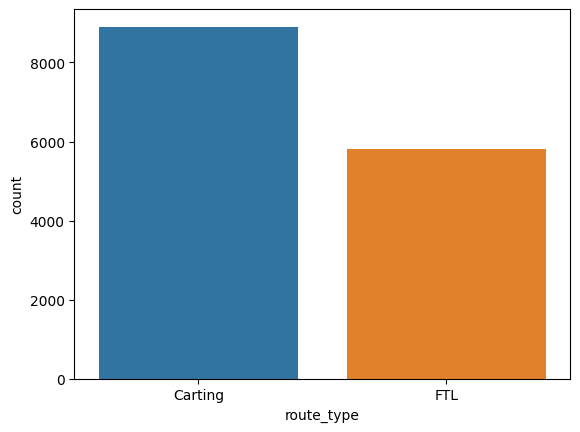

In [104]:
plt.rcdefaults()
sns.countplot(data=final_df, x='route_type')
plt.show()

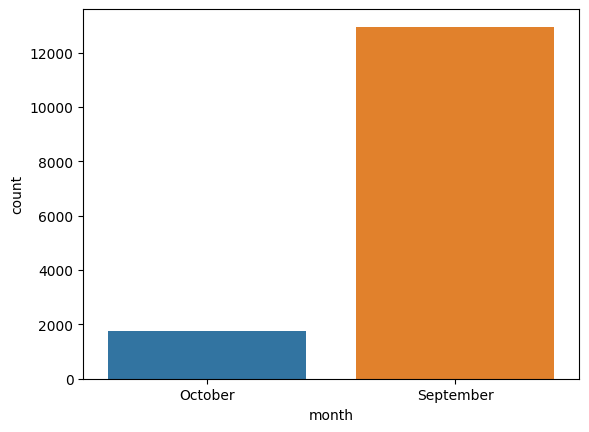

In [105]:
plt.rcdefaults()
sns.countplot(data=final_df, x='month')
plt.show()

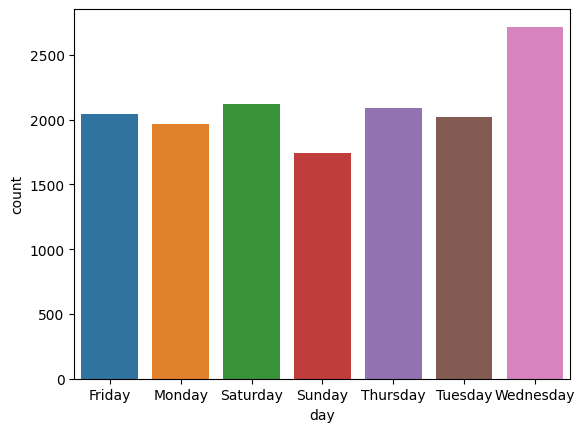

In [106]:
plt.rcdefaults()
sns.countplot(data=final_df, x='day')
plt.show()

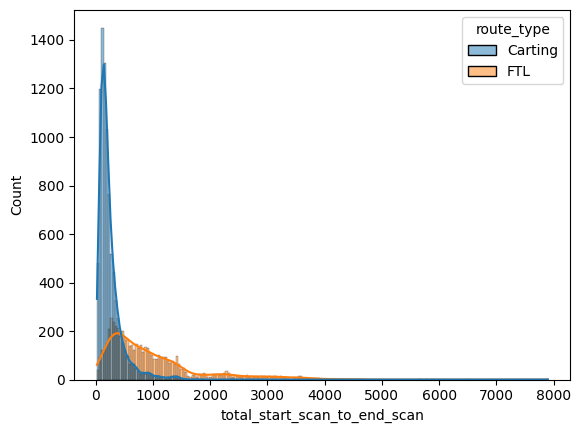

In [107]:
plt.rcdefaults()
sns.histplot(data=final_df, x='total_start_scan_to_end_scan', hue='route_type', kde=True)
plt.show()

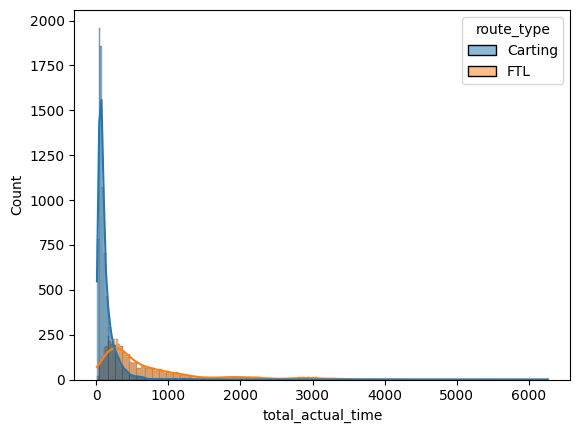

In [108]:
plt.rcdefaults()
sns.histplot(data=final_df, x='total_actual_time', hue='route_type', kde=True)
plt.show()

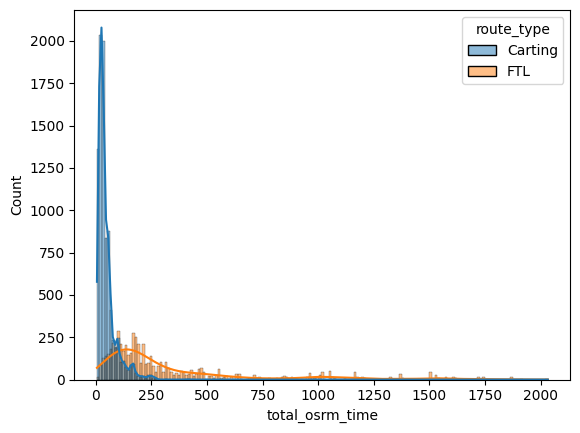

In [109]:
plt.rcdefaults()
sns.histplot(data=final_df, x='total_osrm_time', hue='route_type', kde=True)
plt.show()

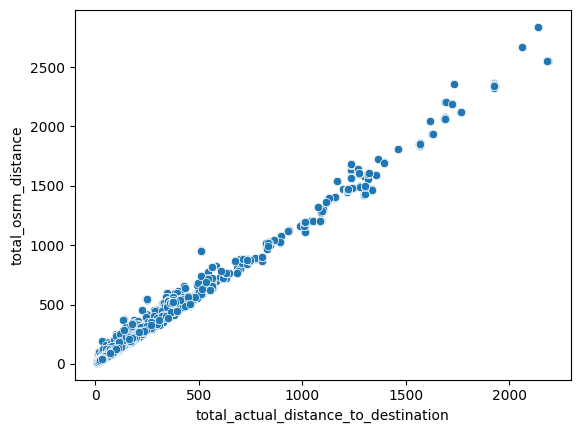

In [110]:
plt.rcdefaults()
sns.scatterplot(data=final_df, x='total_actual_distance_to_destination', y='total_osrm_distance')
plt.show()

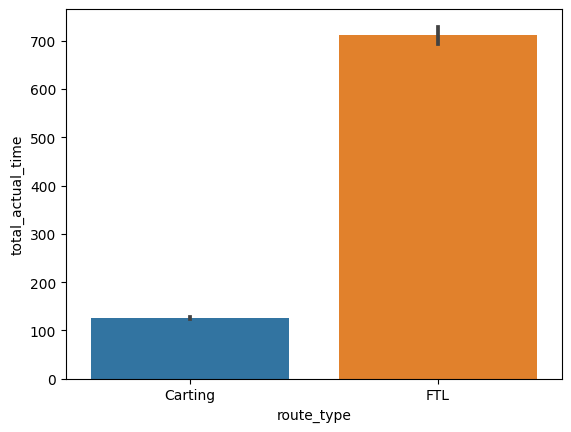

In [111]:
plt.rcdefaults()
sns.barplot(data=final_df, x='route_type', y='total_actual_time', estimator=np.mean)
plt.show()

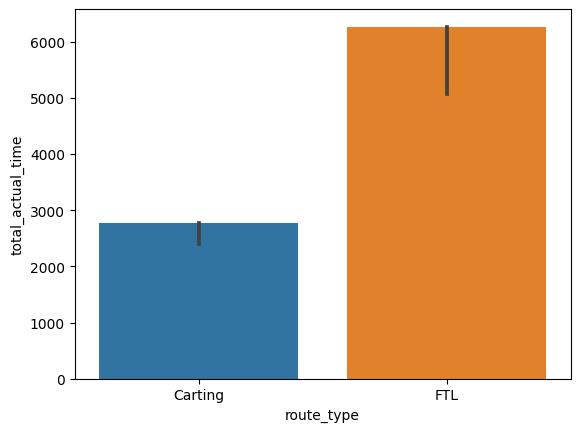

In [112]:
plt.rcdefaults()
sns.barplot(data=final_df, x='route_type', y='total_actual_time', estimator=np.max)
plt.show()

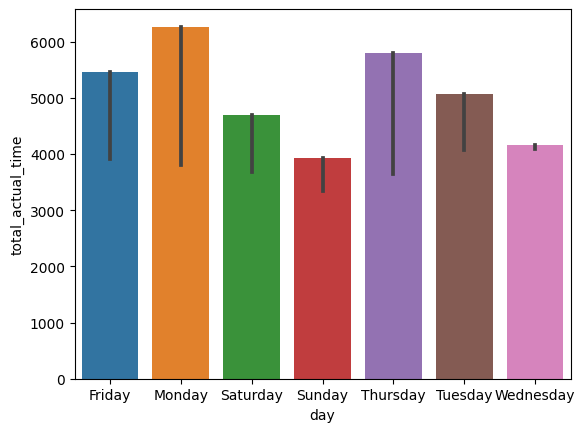

In [113]:
plt.rcdefaults()
sns.barplot(data=final_df, x='day', y='total_actual_time', estimator=np.max)
plt.show()

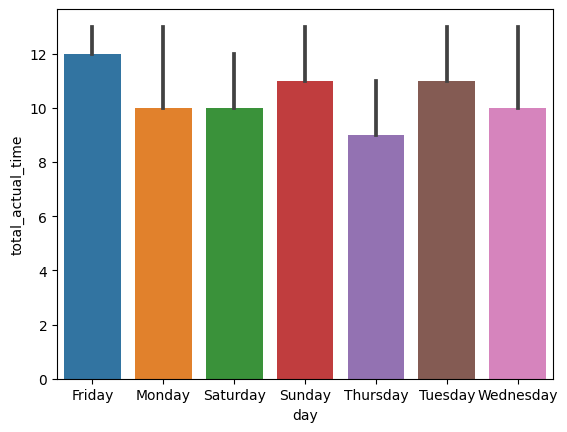

In [114]:
plt.rcdefaults()
sns.barplot(data=final_df, x='day', y='total_actual_time', estimator=np.min)
plt.show()

## Finding correlation between numerical features

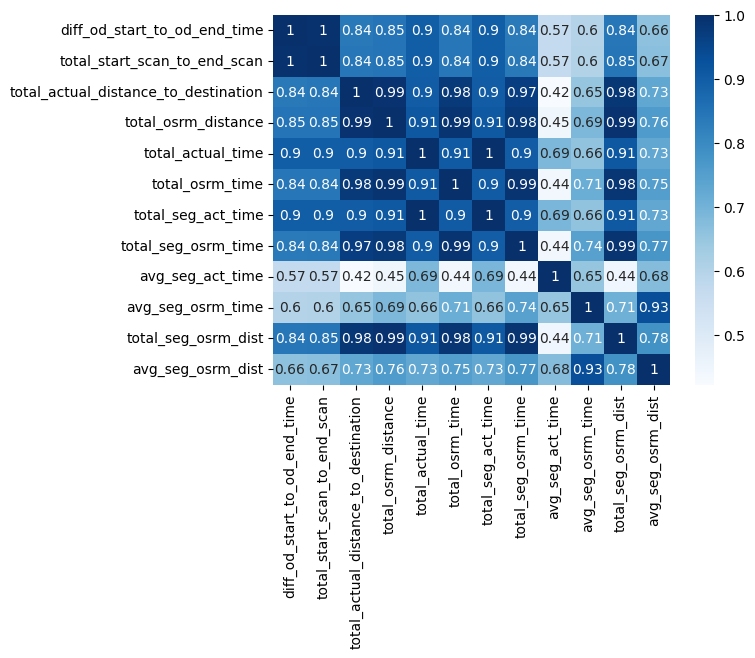

In [115]:
plt.rcdefaults()
data_corr = final_df[['diff_od_start_to_od_end_time', 'total_start_scan_to_end_scan',
                      'total_actual_distance_to_destination', 'total_osrm_distance',
                      'total_actual_time', 'total_osrm_time',
                      'total_seg_act_time', 'total_seg_osrm_time', 
                      'avg_seg_act_time', 'avg_seg_osrm_time',
                      'total_seg_osrm_dist', 'avg_seg_osrm_dist']].corr(method='spearman')
sns.heatmap(data_corr, cmap='Blues', annot=True)
plt.show()

## Insights and Observations from exploration of data:

1. After aggregating over trip_uuid and counting all trips it is observed that "carting" route type has higher number of trips than "FTL" route type trips in given data
2. Total actual distance to destination has max value of 379 km in "carting" route type and 2187 km in "FTL" route type
3. Max total actual time is 2764 mins in "carting" route type and for "FTL" route type is 6265 mins
4. Max source-destination pairs in "carting" route type is 7 and in "FTL" route type is 8
5. Max total segments in "carting" route type trip is 49 and in "FTL" route type trip is 101
6. Given data is all trips happened in sept-oct 2018, out of which max trips are in month of september 
7. "wednsday" seems busiest out of all week days as it has highest order of package deliveries
8. Highest package delivery orders came from "Mumbai" city, "Maharashtra" state
9. "Bengaluru" city is main hub for "carting" route type while "Gurgaon" city is main hub for "FTL" route type
10. Main city corridor for "carting" route type is "Mumbai" and for "FTL" route type is "Chandigarh"
11. For any route type "Maharashtra" is the main state corridor
12. There is positive linear correlation between "total_actual_distance_to_destination" and "total_osrm_distance"
13. There is positive linear correlation between "total_osrm_distance" and "total_segment_osrm_distance"
14. There is positive linear correlation between "total_actual_time" and "total_segment_actual_time"
15. There is positive linear correlation between "total_start_scan_to_end_scan_time" and "diff_od_start_time_od_end_time"

__Do hypothesis testing/ visual analysis between (difference between od_start_time and od_end_time) and start_scan_to_end_scan__

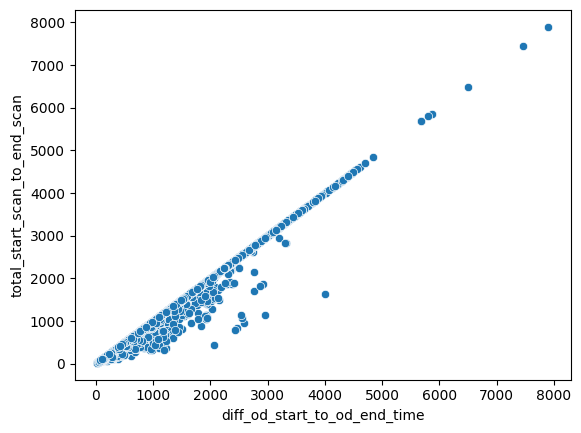

In [116]:
plt.rcdefaults()
sns.scatterplot(data=final_df, x='diff_od_start_to_od_end_time', y='total_start_scan_to_end_scan')
plt.show()

In [117]:
# check for monotonic relation between two quantitative features

# Null Hypothesis Ho = There is no correlation bewteen two features
# Alternate Hypothesis Ha = There is linear correlation between two features

corr, p_values = stats.pearsonr(final_df['diff_od_start_to_od_end_time'], final_df['total_start_scan_to_end_scan'])
print(corr, p_values)

0.9936207302589561 0.0


__We can reject the null hypothesis as P_value < 0.05__

__There is monotonic linear positive relation bewteen two features as corr_coeff = 0.99__ 

__Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value__

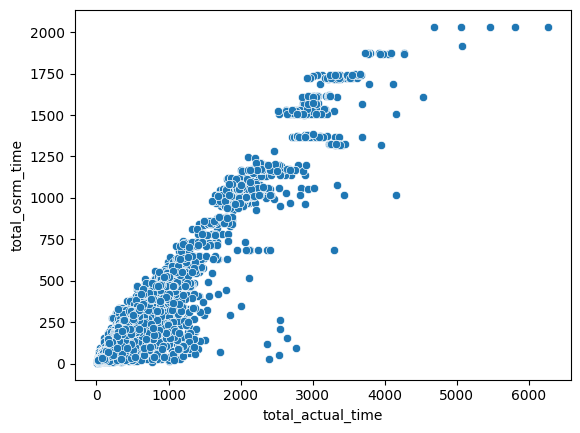

In [118]:
plt.rcdefaults()
sns.scatterplot(data=final_df, x='total_actual_time', y='total_osrm_time')
plt.show()

In [119]:
# check for monotonic relation between two quantitative features

# Null Hypothesis Ho = There is no correlation bewteen two features
# Alternate Hypothesis Ha = There is linear correlation between two features

corr, p_values = stats.pearsonr(final_df['total_actual_time'], final_df['total_osrm_time'])
print(corr, p_values)

0.9588212607240736 0.0


__Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value__

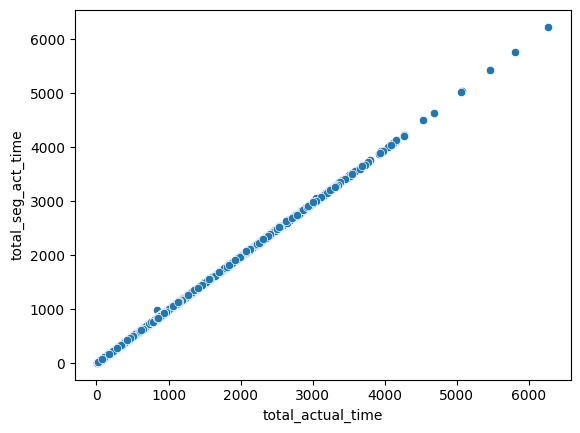

In [120]:
plt.rcdefaults()
sns.scatterplot(data=final_df, x='total_actual_time', y='total_seg_act_time')
plt.show()

In [121]:
# check for monotonic relation between two quantitative features

# Null Hypothesis Ho = There is no correlation bewteen two features
# Alternate Hypothesis Ha = There is linear correlation between two features

corr, p_values = stats.pearsonr(final_df['total_actual_time'], final_df['total_seg_act_time'])
print(corr, p_values)

0.999988951792222 0.0


__We can reject the null hypothesis as P_value < 0.05__

__There is monotonic linear positive relation bewteen two features as corr_coeff = 0.99__ 

__Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value__

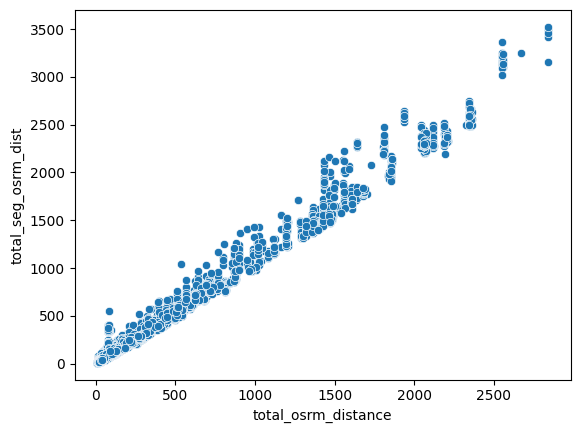

In [122]:
plt.rcdefaults()
sns.scatterplot(data=final_df, x='total_osrm_distance', y='total_seg_osrm_dist')
plt.show()

In [123]:
# check for monotonic relation between two quantitative features

# Null Hypothesis Ho = There is no correlation bewteen two features
# Alternate Hypothesis Ha = There is linear correlation between two features

corr, p_values = stats.pearsonr(final_df['total_osrm_distance'], final_df['total_seg_osrm_dist'])
print(corr, p_values)

0.9947156039026345 0.0


__Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value__

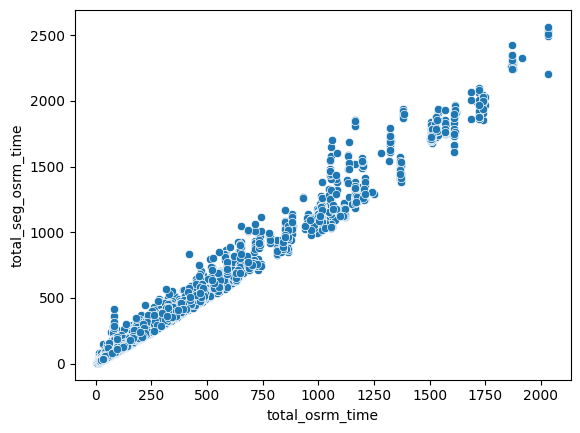

In [124]:
plt.rcdefaults()
sns.scatterplot(data=final_df, x='total_osrm_time', y='total_seg_osrm_time')
plt.show()

In [125]:
# check for monotonic relation between two quantitative features

# Null Hypothesis Ho = There is no correlation bewteen two features
# Alternate Hypothesis Ha = There is linear correlation between two features

corr, p_values = stats.pearsonr(final_df['total_osrm_time'], final_df['total_seg_osrm_time'])
print(corr, p_values)

0.9932710793359056 0.0


## Check for Outlier

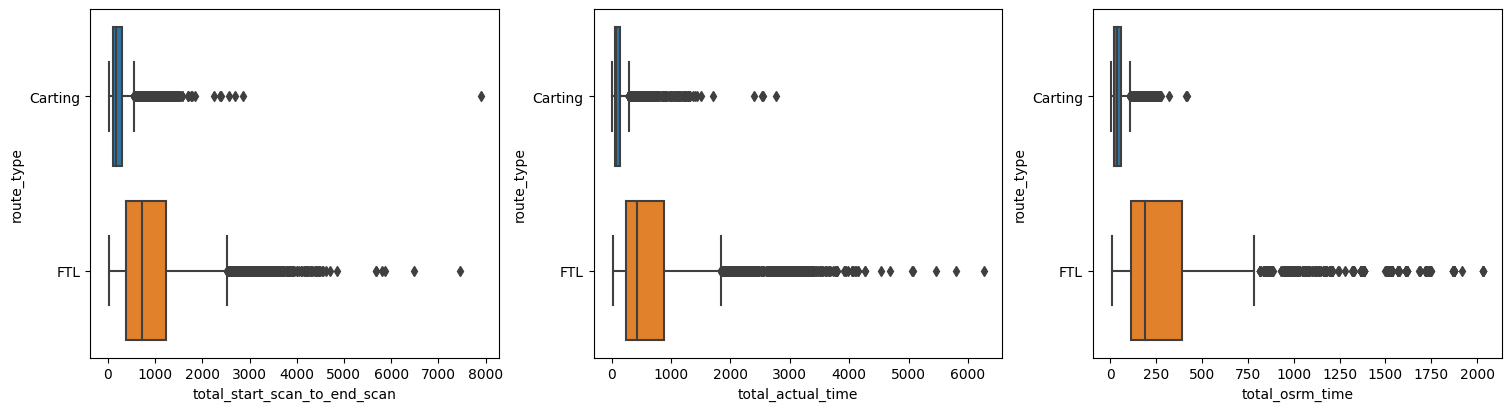

In [126]:
plt.rcdefaults()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), constrained_layout=True)
plt.subplot(131)
sns.boxplot(data=final_df, x='total_start_scan_to_end_scan', y='route_type')
plt.subplot(132)
sns.boxplot(data=final_df, x='total_actual_time', y='route_type')
plt.subplot(133)
sns.boxplot(data=final_df, x='total_osrm_time', y='route_type')
plt.show()

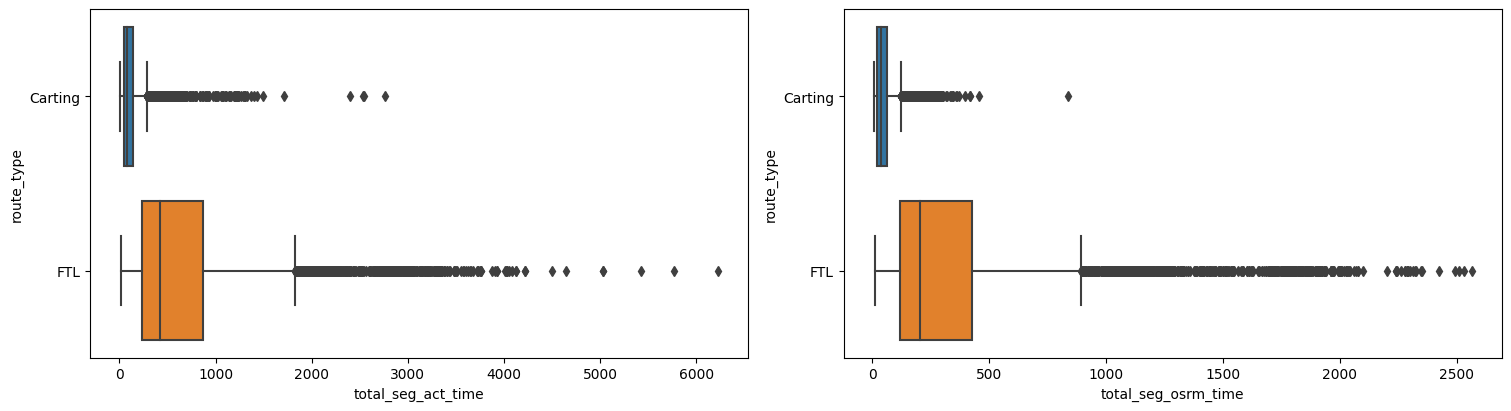

In [127]:
plt.rcdefaults()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), constrained_layout=True)
plt.subplot(121)
sns.boxplot(data=final_df, x='total_seg_act_time', y='route_type')
plt.subplot(122)
sns.boxplot(data=final_df, x='total_seg_osrm_time', y='route_type')
plt.show()

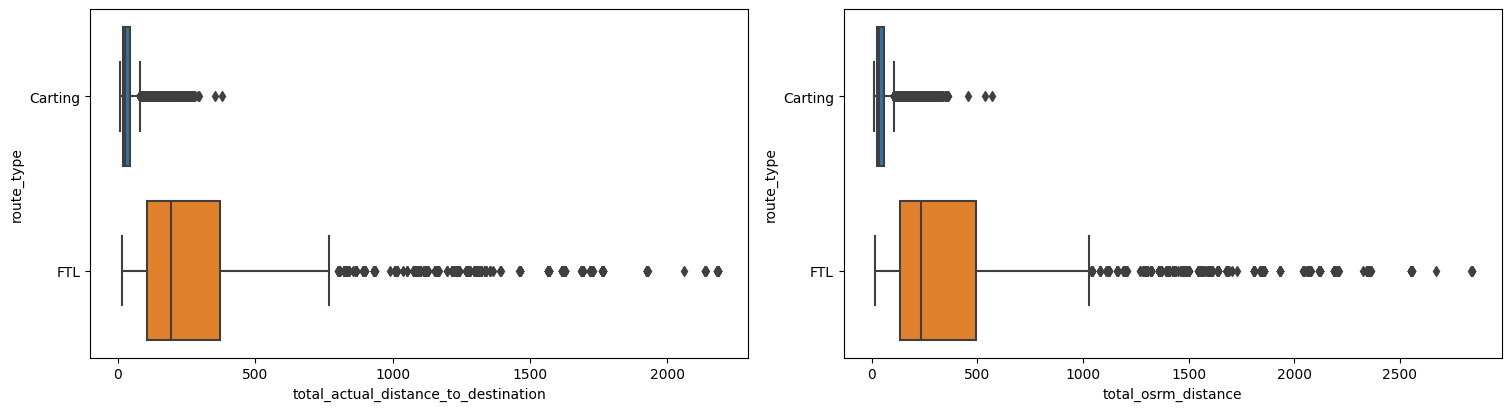

In [128]:
plt.rcdefaults()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), constrained_layout=True)
plt.subplot(121)
sns.boxplot(data=final_df, x='total_actual_distance_to_destination', y='route_type')
plt.subplot(122)
sns.boxplot(data=final_df, x='total_osrm_distance', y='route_type')
plt.show()

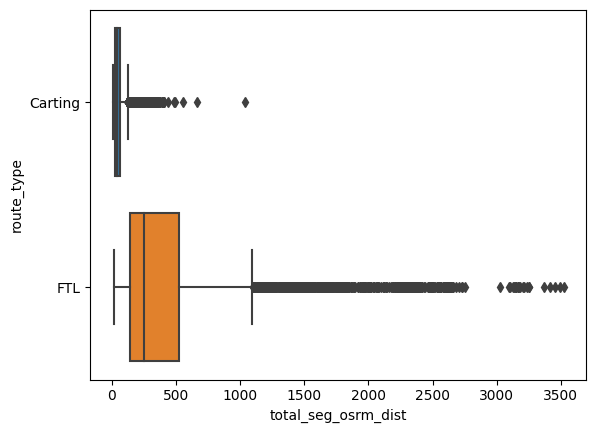

In [129]:
plt.rcdefaults()
sns.boxplot(data=final_df, x='total_seg_osrm_dist', y='route_type')
plt.show()

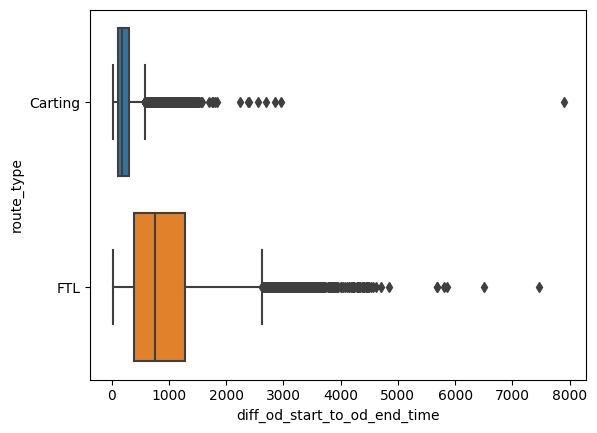

In [130]:
plt.rcdefaults()
sns.boxplot(data=final_df, x='diff_od_start_to_od_end_time', y='route_type')
plt.show()

__From above box plots it is clear that almost all numarical features selected above have outliers__

## Outlier Detection by IQR method and Imputation by Quantile based flooring and capping

In [131]:
model_df = final_df.copy()

In [132]:
from sklearn.impute import SimpleImputer

def outlier_check(condition_column, outlier_column):
    global model_df
    
    Q1 = model_df[outlier_column].quantile(0.25)
    Q3 = model_df[outlier_column].quantile(0.75)
    IQR  = (Q3 - Q1)
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    
    print('Percentage of outliers in', '"', outlier_column, '"', 'column: ', end='')
    outlier_percentage = round(((len(model_df[model_df[outlier_column]>upper_limit]))
                                /(len(model_df[outlier_column])))*100, 2)
    print(outlier_percentage, '%')
    
    cond_col_val = model_df[condition_column].unique()
    for i in cond_col_val:
        Q1 = model_df.loc[model_df[condition_column]==i][outlier_column].quantile(0.25)
        Q3 = model_df.loc[model_df[condition_column]==i][outlier_column].quantile(0.75)
        IQR  = (Q3 - Q1)
        lower_limit = Q1 - (1.5 * IQR)
        upper_limit = Q3 + (1.5 * IQR)
        
        dummy = pd.DataFrame(model_df[model_df[condition_column]==i][outlier_column])

        print('Percentage of outliers in', '"', outlier_column, '"', 'column with route type', i, ':', end='')
        outlier_percentage = round((len(dummy[dummy[outlier_column]>upper_limit])/len(dummy) * 100), 2)
        print(outlier_percentage, '%')
    
    return 'Outlier Check Successful !!'

def outlier_imputation(condition_column, outlier_column):
    global model_df
    
    # imputation based on condition column values
    cond_col_val = model_df[condition_column].unique()
    for i in cond_col_val:
        Q1 = model_df.loc[model_df[condition_column]==i][outlier_column].quantile(0.25)
        Q3 = model_df.loc[model_df[condition_column]==i][outlier_column].quantile(0.75)
        IQR  = (Q3 - Q1)
        lower_limit = Q1 - (1.5 * IQR)
        upper_limit = Q3 + (1.5 * IQR)
        
        dummy = pd.DataFrame(model_df[model_df[condition_column]==i][outlier_column])
        
        print('Number of rows of outliers in', '"', outlier_column, '"', 'column with route type', i, ':', end='')
        outlier_row_id = dummy.loc[dummy[outlier_column]>upper_limit].index.to_list()
        print(len(outlier_row_id))
    
        perc_10 = dummy[outlier_column].quantile(0.10)
        perc_90 = dummy[outlier_column].quantile(0.90)
        
        for j in outlier_row_id:
            model_df.at[j, outlier_column] = np.nan

        imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=perc_90)
        lst = [outlier_column]
        model_df[lst] = imputer.fit_transform(model_df[lst])
        
    return 'Outlier Imputation with Quantile based flooring and capping (10%-90%) Successful !!'

In [133]:
outlier_check('route_type', 'total_start_scan_to_end_scan')

Percentage of outliers in " total_start_scan_to_end_scan " column: 8.72 %
Percentage of outliers in " total_start_scan_to_end_scan " column with route type Carting :7.05 %
Percentage of outliers in " total_start_scan_to_end_scan " column with route type FTL :7.01 %


'Outlier Check Successful !!'

In [134]:
outlier_imputation('route_type', 'total_start_scan_to_end_scan')

Number of rows of outliers in " total_start_scan_to_end_scan " column with route type Carting :628
Number of rows of outliers in " total_start_scan_to_end_scan " column with route type FTL :407


'Outlier Imputation with Quantile based flooring and capping (10%-90%) Successful !!'

In [135]:
outlier_check('route_type', 'total_actual_time')

Percentage of outliers in " total_actual_time " column: 11.18 %
Percentage of outliers in " total_actual_time " column with route type Carting :8.51 %
Percentage of outliers in " total_actual_time " column with route type FTL :9.79 %


'Outlier Check Successful !!'

In [136]:
outlier_imputation('route_type', 'total_actual_time')

Number of rows of outliers in " total_actual_time " column with route type Carting :758
Number of rows of outliers in " total_actual_time " column with route type FTL :568


'Outlier Imputation with Quantile based flooring and capping (10%-90%) Successful !!'

In [137]:
outlier_check('route_type', 'total_osrm_time')

Percentage of outliers in " total_osrm_time " column: 10.24 %
Percentage of outliers in " total_osrm_time " column with route type Carting :7.75 %
Percentage of outliers in " total_osrm_time " column with route type FTL :11.82 %


'Outlier Check Successful !!'

In [138]:
outlier_imputation('route_type', 'total_osrm_time')

Number of rows of outliers in " total_osrm_time " column with route type Carting :690
Number of rows of outliers in " total_osrm_time " column with route type FTL :686


'Outlier Imputation with Quantile based flooring and capping (10%-90%) Successful !!'

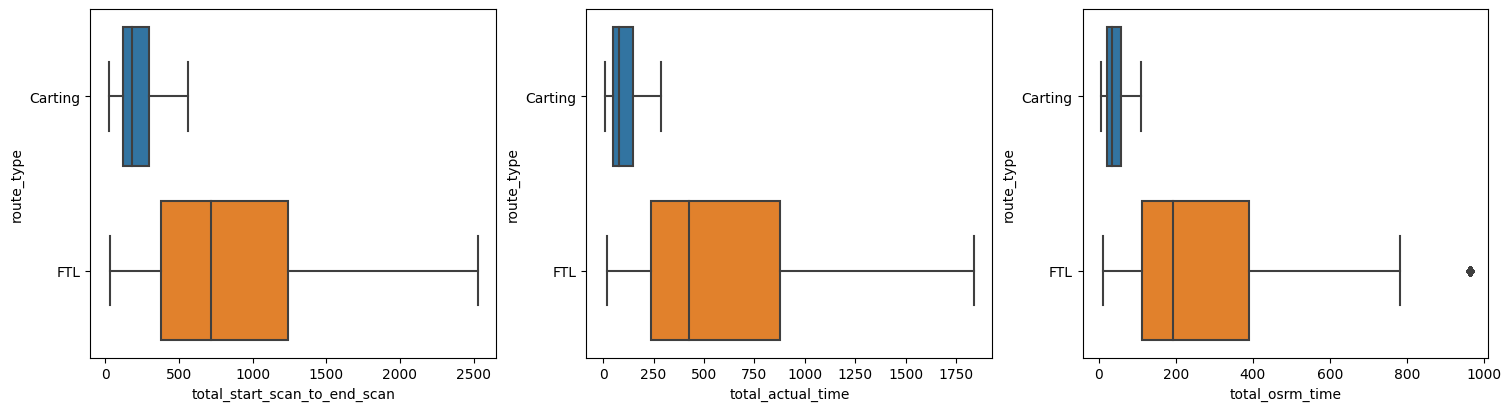

In [139]:
plt.rcdefaults()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), constrained_layout=True)
plt.subplot(131)
sns.boxplot(data=model_df, x='total_start_scan_to_end_scan', y='route_type')
plt.subplot(132)
sns.boxplot(data=model_df, x='total_actual_time', y='route_type')
plt.subplot(133)
sns.boxplot(data=model_df, x='total_osrm_time', y='route_type')
plt.show()

In [140]:
outlier_check('route_type', 'total_seg_act_time')

Percentage of outliers in " total_seg_act_time " column: 11.16 %
Percentage of outliers in " total_seg_act_time " column with route type Carting :8.36 %
Percentage of outliers in " total_seg_act_time " column with route type FTL :9.72 %


'Outlier Check Successful !!'

In [141]:
outlier_imputation('route_type', 'total_seg_act_time')

Number of rows of outliers in " total_seg_act_time " column with route type Carting :744
Number of rows of outliers in " total_seg_act_time " column with route type FTL :564


'Outlier Imputation with Quantile based flooring and capping (10%-90%) Successful !!'

In [142]:
outlier_check('route_type', 'total_seg_osrm_time')

Percentage of outliers in " total_seg_osrm_time " column: 10.09 %
Percentage of outliers in " total_seg_osrm_time " column with route type Carting :9.96 %
Percentage of outliers in " total_seg_osrm_time " column with route type FTL :12.01 %


'Outlier Check Successful !!'

In [143]:
outlier_imputation('route_type', 'total_seg_osrm_time')

Number of rows of outliers in " total_seg_osrm_time " column with route type Carting :887
Number of rows of outliers in " total_seg_osrm_time " column with route type FTL :697


'Outlier Imputation with Quantile based flooring and capping (10%-90%) Successful !!'

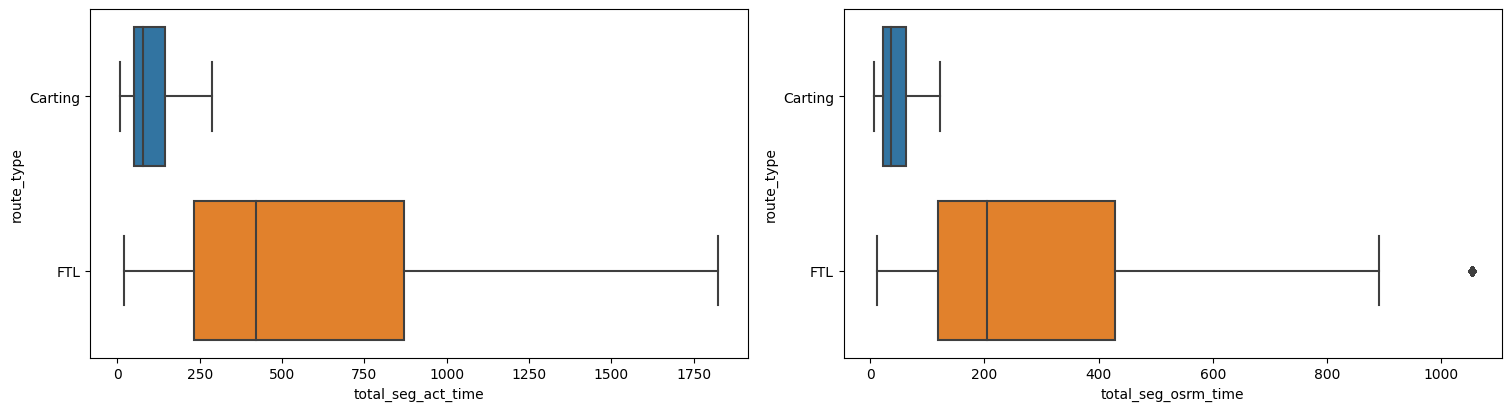

In [144]:
plt.rcdefaults()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), constrained_layout=True)
plt.subplot(121)
sns.boxplot(data=model_df, x='total_seg_act_time', y='route_type')
plt.subplot(122)
sns.boxplot(data=model_df, x='total_seg_osrm_time', y='route_type')
plt.show()

In [145]:
outlier_check('route_type', 'total_actual_distance_to_destination')

Percentage of outliers in " total_actual_distance_to_destination " column: 9.85 %
Percentage of outliers in " total_actual_distance_to_destination " column with route type Carting :10.56 %
Percentage of outliers in " total_actual_distance_to_destination " column with route type FTL :13.46 %


'Outlier Check Successful !!'

In [146]:
outlier_imputation('route_type', 'total_actual_distance_to_destination')

Number of rows of outliers in " total_actual_distance_to_destination " column with route type Carting :940
Number of rows of outliers in " total_actual_distance_to_destination " column with route type FTL :781


'Outlier Imputation with Quantile based flooring and capping (10%-90%) Successful !!'

In [147]:
outlier_check('route_type', 'total_osrm_distance')

Percentage of outliers in " total_osrm_distance " column: 10.34 %
Percentage of outliers in " total_osrm_distance " column with route type Carting :11.1 %
Percentage of outliers in " total_osrm_distance " column with route type FTL :12.01 %


'Outlier Check Successful !!'

In [148]:
outlier_imputation('route_type', 'total_osrm_distance')

Number of rows of outliers in " total_osrm_distance " column with route type Carting :988
Number of rows of outliers in " total_osrm_distance " column with route type FTL :697


'Outlier Imputation with Quantile based flooring and capping (10%-90%) Successful !!'

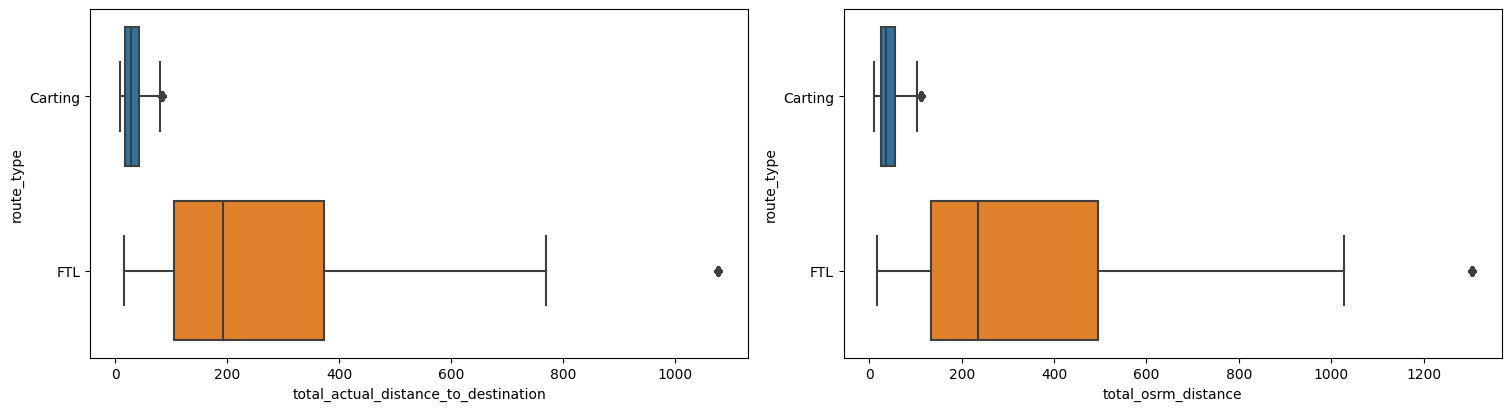

In [149]:
plt.rcdefaults()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), constrained_layout=True)
plt.subplot(121)
sns.boxplot(data=model_df, x='total_actual_distance_to_destination', y='route_type')
plt.subplot(122)
sns.boxplot(data=model_df, x='total_osrm_distance', y='route_type')
plt.show()

In [150]:
outlier_check('route_type', 'total_seg_osrm_dist')

Percentage of outliers in " total_seg_osrm_dist " column: 10.53 %
Percentage of outliers in " total_seg_osrm_dist " column with route type Carting :11.29 %
Percentage of outliers in " total_seg_osrm_dist " column with route type FTL :12.8 %


'Outlier Check Successful !!'

In [151]:
outlier_imputation('route_type', 'total_seg_osrm_dist')

Number of rows of outliers in " total_seg_osrm_dist " column with route type Carting :1005
Number of rows of outliers in " total_seg_osrm_dist " column with route type FTL :743


'Outlier Imputation with Quantile based flooring and capping (10%-90%) Successful !!'

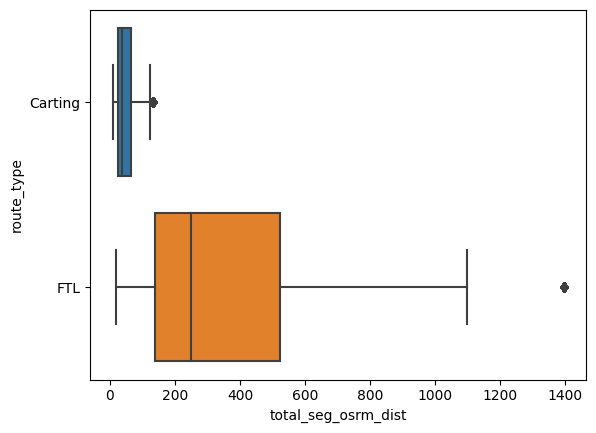

In [152]:
plt.rcdefaults()
sns.boxplot(data=model_df, x='total_seg_osrm_dist', y='route_type')
plt.show()

In [153]:
outlier_check('route_type', 'diff_od_start_to_od_end_time')

Percentage of outliers in " diff_od_start_to_od_end_time " column: 7.59 %
Percentage of outliers in " diff_od_start_to_od_end_time " column with route type Carting :7.43 %
Percentage of outliers in " diff_od_start_to_od_end_time " column with route type FTL :6.51 %


'Outlier Check Successful !!'

In [154]:
outlier_imputation('route_type', 'diff_od_start_to_od_end_time')

Number of rows of outliers in " diff_od_start_to_od_end_time " column with route type Carting :662
Number of rows of outliers in " diff_od_start_to_od_end_time " column with route type FTL :378


'Outlier Imputation with Quantile based flooring and capping (10%-90%) Successful !!'

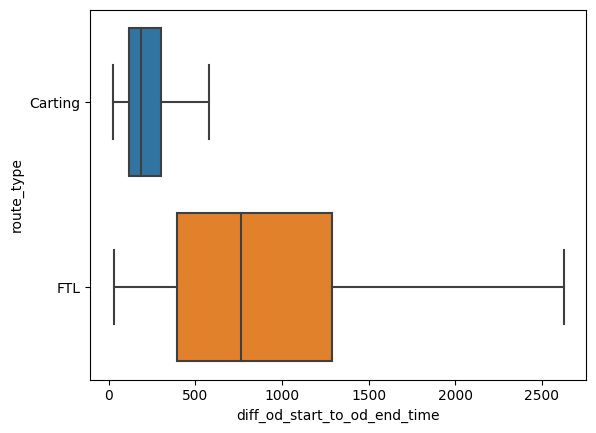

In [155]:
plt.rcdefaults()
sns.boxplot(data=model_df, x='diff_od_start_to_od_end_time', y='route_type')
plt.show()

## one-hot encoding of categorical variables

In [156]:
data = model_df.copy()

In [157]:
data['route_type'].value_counts()

Carting    8904
FTL        5803
Name: route_type, dtype: int64

In [158]:
data['data'].value_counts()

training    10614
test         4093
Name: data, dtype: int64

In [159]:
data['day'].value_counts()

Wednesday    2717
Saturday     2118
Thursday     2093
Friday       2047
Tuesday      2022
Monday       1966
Sunday       1744
Name: day, dtype: int64

In [160]:
cat_cols = ['route_type', 'data', 'month', 'day']

In [161]:
for col in cat_cols:
    data = pd.concat([data, pd.get_dummies(data[col], drop_first=True, prefix=col)], axis=1)

data.drop(columns=cat_cols, inplace=True)

In [162]:
encod_col = data.dtypes=='uint8'
encod_col = list(encod_col[encod_col].index)
encod_col

['route_type_FTL',
 'data_training',
 'month_September',
 'day_Monday',
 'day_Saturday',
 'day_Sunday',
 'day_Thursday',
 'day_Tuesday',
 'day_Wednesday']

In [163]:
data[encod_col[:]]

,route_type_FTL,data_training,month_September,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,0,1,1,0,0,0,1,0,0
1,1,1,1,0,0,1,0,0,0
2,0,1,1,0,0,0,0,0,0
3,1,1,1,0,0,0,1,0,0
4,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
14702,1,1,1,0,0,0,0,0,1
14703,0,1,1,0,0,0,0,0,0
14704,1,1,1,0,1,0,0,0,0
14705,0,1,1,1,0,0,0,0,0


## Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler

__Getting numerical features from data__

In [164]:
data_num1 = (data.dtypes=='float64')
data_num2 = (data.dtypes=='uint8')
data_num1 = np.array(list(data_num1[data_num1].index))
data_num2 = np.array(list(data_num2[data_num2].index))
data_num = np.append(data_num1, data_num2)
data_num

array(['total_start_scan_to_end_scan',
       'total_actual_distance_to_destination', 'total_osrm_distance',
       'total_actual_time', 'total_osrm_time', 'total_seg_act_time',
       'max_seg_act_time', 'min_seg_act_time', 'avg_seg_act_time',
       'total_seg_osrm_time', 'max_seg_osrm_time', 'min_seg_osrm_time',
       'avg_seg_osrm_time', 'total_seg_osrm_dist', 'max_seg_osrm_dist',
       'min_seg_osrm_dist', 'avg_seg_osrm_dist',
       'diff_od_start_to_od_end_time', 'route_type_FTL', 'data_training',
       'month_September', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday'], dtype='<U36')

In [165]:
new_data = data[data_num[:]].copy()
new_data

,total_start_scan_to_end_scan,total_actual_distance_to_destination,total_osrm_distance,total_actual_time,total_osrm_time,total_seg_act_time,max_seg_act_time,min_seg_act_time,avg_seg_act_time,total_seg_osrm_time,...,diff_od_start_to_od_end_time,route_type_FTL,data_training,month_September,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,195.0,84.3,112.3,170.0,89.0,167.0,28.0,6.0,16.7,88.0,...,195.4,0,1,1,0,0,0,1,0,0
1,302.0,100.7,129.4,183.0,95.0,180.0,41.0,23.0,36.0,106.0,...,302.4,1,1,1,0,0,1,0,0,0
2,108.0,16.4,18.8,60.0,16.0,60.0,46.0,14.0,30.0,16.0,...,109.0,0,1,1,0,0,0,0,0,0
3,1031.0,371.5,524.7,805.0,486.0,799.0,94.0,20.0,44.4,502.0,...,1031.7,1,1,1,0,0,0,1,0,0
4,261.0,95.5,123.8,152.0,123.0,151.0,51.0,19.0,30.2,137.0,...,262.6,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14702,869.0,377.9,518.9,625.0,423.0,617.0,67.0,0.0,32.5,507.0,...,870.3,1,1,1,0,0,0,0,0,1
14703,393.0,23.0,33.8,266.0,31.0,262.0,302.0,42.0,172.0,36.0,...,393.9,0,1,1,0,0,0,0,0,0
14704,614.0,100.6,129.2,289.0,95.0,288.0,91.0,42.0,57.6,111.0,...,614.4,1,1,1,0,1,0,0,0,0
14705,116.0,31.7,36.8,84.0,33.0,82.0,32.0,9.0,20.5,31.0,...,116.9,0,1,1,1,0,0,0,0,0


In [166]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### MinMaxScaler

In [167]:
scaler = MinMaxScaler()
minmax_data = scaler.fit_transform(new_data)
minmax_data = pd.DataFrame(minmax_data, columns=new_data.columns)
minmax_data.head()

,total_start_scan_to_end_scan,total_actual_distance_to_destination,total_osrm_distance,total_actual_time,total_osrm_time,total_seg_act_time,max_seg_act_time,min_seg_act_time,avg_seg_act_time,total_seg_osrm_time,...,diff_od_start_to_od_end_time,route_type_FTL,data_training,month_September,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,0.068663,0.070415,0.079668,0.088026,0.086729,0.087004,0.006246,0.075873,0.003514,0.078259,...,0.065991,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.111377,0.085751,0.092869,0.095134,0.092999,0.094163,0.010519,0.081032,0.009852,0.095438,...,0.107067,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.033932,0.006920,0.007488,0.027884,0.010449,0.028084,0.012163,0.078300,0.007882,0.009544,...,0.032823,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.402395,0.338981,0.398030,0.435210,0.501567,0.435022,0.027942,0.080121,0.012611,0.473373,...,0.387040,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.095010,0.080888,0.088545,0.078185,0.122257,0.078194,0.013807,0.079818,0.007947,0.125024,...,0.091789,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


### StandardScaler

In [168]:
scaler = StandardScaler()
std_data = scaler.fit_transform(new_data)
std_data = pd.DataFrame(std_data, columns=new_data.columns)
std_data.head()

,total_start_scan_to_end_scan,total_actual_distance_to_destination,total_osrm_distance,total_actual_time,total_osrm_time,total_seg_act_time,max_seg_act_time,min_seg_act_time,avg_seg_act_time,total_seg_osrm_time,...,diff_od_start_to_od_end_time,route_type_FTL,data_training,month_September,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,-0.543743,-0.257107,-0.239255,-0.339854,-0.260919,-0.343226,-0.409727,-0.151181,-0.292523,-0.300234,...,-0.557839,-0.807298,0.620985,0.368342,-0.392817,-0.410173,-0.366793,2.454945,-0.39925,-0.476031
1,-0.341313,-0.191743,-0.181951,-0.309496,-0.233630,-0.312563,-0.321427,0.099388,-0.023920,-0.226168,...,-0.361471,1.238700,0.620985,0.368342,-0.392817,-0.410173,2.726337,-0.407341,-0.39925,-0.476031
2,-0.708335,-0.527730,-0.552584,-0.596732,-0.592931,-0.595601,-0.287465,-0.033266,-0.107423,-0.596499,...,-0.716402,-0.807298,0.620985,0.368342,-0.392817,-0.410173,-0.366793,-0.407341,-0.39925,-0.476031
3,1.037855,0.887559,1.142742,1.143029,1.544681,1.147441,0.038567,0.055170,0.092985,1.403290,...,0.976956,1.238700,0.620985,0.368342,-0.392817,-0.410173,-0.366793,2.454945,-0.39925,-0.476031
4,-0.418880,-0.212468,-0.200718,-0.381889,-0.106283,-0.380964,-0.253503,0.040431,-0.104640,-0.098609,...,-0.434513,1.238700,-1.610344,0.368342,-0.392817,2.437994,-0.366793,-0.407341,-0.39925,-0.476031


# Recommendations

1. "total_actual_time" & "total_segment_actual_time" have strong linear monotonic increasing correlation, so we can drop one of the featue as it becomes redundant
2. "diff_od_start_to_od_end_time" & "total_start_scan_to_end_scan" have strong linear monotonic increasing correlation, so we can drop one of the featue as it becomes redundant
3. For "Carting" route type, "Bengaluru" city tops the position as source city and for "FTL" route type, "Gurgaon" city tops the position as source city so making availability of world class logistics arrangmanets and infrastructure might help in operations efficiency & business profitability
4. "Maharashtra" state can be seen as good corridor for both "carting" & "FTL" route type to connect different parts of the nation so invensting in the top cities in "Maharashtra" state to build new infrastructure and technological advancement could help operations and business to take lead over competitors
5. "Carting" route type has high number of entries comapred to "FTL" route type that is also important point to consider to increase business in "Carting" route type activity like providing better intercity and intracity or intrastate transport solutions to customers
6. "Sunday" day of the week is having least orders as comapred to other days of the week, marketing team can target some specifice customoers to engage more and bulid collaboration with them to get more orders by providing some extra discounts or attractive offers on the shipping charges